# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

# **Reading the data**

In [ ]:
# final user_features data from feature engineering
# importing data
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
path='/content/drive/My Drive/Datasets/master_project/'
df= path+'users_features.csv'
customers = pd.read_csv(df)
customers = customers.drop(['Unnamed: 0'],axis=1)
print('shape',customers.shape)
customers


Mounted at /content/drive
shape (5782, 21)


user_id  gender  married home_country  has_children  age  tenure_months  \
0      531931       1    False          usa         False   40             26   
1      611065       1    False          usa         False   43             25   
2      229330       1     True          usa         False   48             33   
3      586762       1    False       canada         False   37             25   
4      536035       0    False          usa         False   29             26   
...       ...     ...      ...          ...           ...  ...            ...   
5777   521235       1    False          usa         False   35             26   
5778   591155       0     True       canada         False   42             25   
5779   600351       1     True          usa         False   48             25   
5780   577044       1     True          usa          True   55             26   
5781   597300       1     True          usa          True   37             25   

      amount_of_trips  amount_of_sessions  avg_page_clicks  ...  rooms_avg  \
0                   2                   8         9.375000  ...   1.500000   
1                   4                   8        19.875000  ...   1.500000   
2                   4                   8        16.125000  ...   1.750000   
3                   3                   8        15.750000  ...   1.333333   
4                   2                   8        13.875000  ...   1.500000   
...               ...                 ...              ...  ...        ...   
5777                5                   8        24.250000  ...   1.600000   
5778                2                   8        15.500000  ...   1.000000   
5779                2                   8        15.000000  ...   1.000000   
5780                3                   9        20.333333  ...   1.000000   
5781                2                   8        11.375000  ...   1.500000   

      nights_avg  hotel_price_avg  hotel_count  seats_avg  flight_price_avg  \
0       3.500000       714.000000          2.0   1.500000       1676.630000   
1       2.250000       677.750000          4.0   1.500000       1790.872500   
2       2.000000      1028.500000          4.0   1.750000        720.802500   
3       7.333333      2140.666667          3.0   1.333333        762.496667   
4       1.500000       291.000000          2.0   1.500000        931.700000   
...          ...              ...          ...        ...               ...   
5777    5.400000       918.200000          5.0   1.800000       1541.054000   
5778    4.000000       541.500000          2.0   1.000000        546.350000   
5779    5.000000      1300.000000          1.0   1.000000        523.340000   
5780    1.000000       270.500000          2.0   1.333333        449.743333   
5781    8.000000      2365.000000          2.0   1.500000        486.595000   

      flight_count  checked_bags_avg  avg_km_flown  session_duration_avg_sec  
0              2.0          0.500000   3238.749749                 70.875000  
1              4.0          0.750000   3342.929238                146.750000  
2              4.0          0.250000   1201.119453                119.625000  
3              3.0          0.333333   2818.710430                116.375000  
4              2.0          0.500000   1484.887202                102.750000  
...            ...               ...           ...                       ...  
5777           5.0          1.200000   2816.228255                179.875000  
5778           1.0          1.000000   3163.054440                115.125000  
5779           2.0          0.500000   3121.115690                112.500000  
5780           3.0          0.333333   1193.525629                150.111111  
5781           2.0          0.000000   1494.297709                 83.750000  

[5782 rows x 21 columns]

In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   5782 non-null   int64  
 1   gender                    5782 non-null   int64  
 2   married                   5782 non-null   bool   
 3   home_country              5782 non-null   object 
 4   has_children              5782 non-null   bool   
 5   age                       5782 non-null   int64  
 6   tenure_months             5782 non-null   int64  
 7   amount_of_trips           5782 non-null   int64  
 8   amount_of_sessions        5782 non-null   int64  
 9   avg_page_clicks           5782 non-null   float64
 10  canceled_trips            5782 non-null   float64
 11  rooms_avg                 5782 non-null   float64
 12  nights_avg                5782 non-null   float64
 13  hotel_price_avg           5140 non-null   float64
 14  hotel_co

In [ ]:
customers.drop_duplicates(inplace=True)
customers.shape

(5782, 21)

**Dealing Null Values**

In [ ]:
customers.isnull().sum()

user_id                       0
gender                        0
married                       0
home_country                  0
has_children                  0
age                           0
tenure_months                 0
amount_of_trips               0
amount_of_sessions            0
avg_page_clicks               0
canceled_trips                0
rooms_avg                     0
nights_avg                    0
hotel_price_avg             642
hotel_count                   0
seats_avg                     0
flight_price_avg            927
flight_count                  0
checked_bags_avg            927
avg_km_flown                  0
session_duration_avg_sec      0
dtype: int64

In [ ]:
# filling nan value in customers columns with mean in numerical column and with mode with categorical column

import pandas as pd
# Iterate through each column in the DataFrame
for col in customers.columns:
    # Check if the column is numerical
    if pd.api.types.is_numeric_dtype(customers[col]):
        # Fill NaN values with the mean of the column
        customers[col] = customers[col].fillna(customers[col].mean())
    # If not numerical, assume it's categorical
    else:
        # Fill NaN values with the mode of the column
        customers[col] = customers[col].fillna(customers[col].mode()[0])


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   5782 non-null   int64  
 1   gender                    5782 non-null   int64  
 2   married                   5782 non-null   bool   
 3   home_country              5782 non-null   object 
 4   has_children              5782 non-null   bool   
 5   age                       5782 non-null   int64  
 6   tenure_months             5782 non-null   int64  
 7   amount_of_trips           5782 non-null   int64  
 8   amount_of_sessions        5782 non-null   int64  
 9   avg_page_clicks           5782 non-null   float64
 10  canceled_trips            5782 non-null   float64
 11  rooms_avg                 5782 non-null   float64
 12  nights_avg                5782 non-null   float64
 13  hotel_price_avg           5782 non-null   float64
 14  hotel_co

In [ ]:
customers.drop_duplicates(inplace=True)
customers.shape

(5782, 21)

In [ ]:
user_ids=customers['user_id']
#user_ids
customers['user_id'].nunique()

5782

In [ ]:
customers.describe()

user_id       gender          age  tenure_months  \
count    5782.000000  5782.000000  5782.000000    5782.000000   
mean   547670.236077     0.888966    42.642338      25.995503   
std     64035.394540     0.320200    12.047737       1.154542   
min     94883.000000     0.000000    18.000000      22.000000   
25%    519413.750000     1.000000    36.000000      26.000000   
50%    542279.500000     1.000000    43.000000      26.000000   
75%    576215.500000     1.000000    50.000000      26.000000   
max    844489.000000     2.000000    89.000000      37.000000   

       amount_of_trips  amount_of_sessions  avg_page_clicks  canceled_trips  \
count      5782.000000         5782.000000      5782.000000     5782.000000   
mean          2.677966            8.204082        17.596754        0.101868   
std           1.520225            0.459986         8.787925        0.310960   
min           0.000000            8.000000         4.125000        0.000000   
25%           2.000000            8.000000        12.444444        0.000000   
50%           3.000000            8.000000        15.625000        0.000000   
75%           4.000000            8.000000        19.625000        0.000000   
max           8.000000           12.000000       109.125000        2.000000   

         rooms_avg   nights_avg  hotel_price_avg  hotel_count    seats_avg  \
count  5782.000000  5782.000000      5782.000000  5782.000000  5782.000000   
mean      1.067215     3.820481       928.610853     2.312176     0.995146   
std       0.504186     2.915282       893.911954     1.455297     0.550114   
min       0.000000     0.000000         0.000000     0.000000     0.000000   
25%       1.000000     2.000000       444.000000     1.000000     1.000000   
50%       1.000000     3.333333       747.000000     2.000000     1.000000   
75%       1.250000     5.000000      1015.000000     3.000000     1.200000   
max       4.000000    30.000000     14057.000000     8.000000     6.000000   

       flight_price_avg  flight_count  checked_bags_avg  avg_km_flown  \
count       5782.000000    5782.00000       5782.000000   5782.000000   
mean         677.675536       2.18817          0.579303   1825.924859   
std         1243.258481       1.51663          0.419611   1395.454270   
min            8.170000       0.00000          0.000000      0.000000   
25%          313.914375       1.00000          0.333333    999.698447   
50%          479.997500       2.00000          0.579303   1810.340220   
75%          677.675536       3.00000          0.800000   2494.496930   
max        41666.050000       8.00000          5.000000  15813.840702   

       session_duration_avg_sec  
count               5782.000000  
mean                 115.272507  
std                   35.760350  
min                   30.666667  
25%                   90.555556  
50%                  111.500000  
75%                  136.000000  
max                  431.333333

# **Exploratory Data Analysis (EDA) of New Features**

In [ ]:
#hist plot of all columns from customers
for col in customers.columns:
    sns.histplot(data=customers, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt. ylabel ("Count")
    plt.show()
# value_counts of 'gender','married','home_country','has_children'
print(customers['gender'].value_counts(normalize=True))
print(customers['married'].value_counts(normalize=True))
print(customers['home_country'].value_counts(normalize=True))
print(customers['has_children'].value_counts(normalize=True))
print(customers['canceled_trips'].value_counts(normalize=True))





In [ ]:
sns.scatterplot(data=customers,x='hotel_price_avg', y='flight_price_avg', alpha=0.5)
# several high hotel_price_avg values are associated with low flight_price_avg
# Most data points are densely packed in the lower ranges of both axes

In [ ]:
sns.scatterplot(data=customers,x='avg_page_clicks', y='seats_avg', alpha=0.5)
# higher clicks do not necessarily lead to a higher average number of seats

In [ ]:
sns.scatterplot(data=customers,x='seats_avg', y='rooms_avg')
# some people have seat avg_ high cause they fly more

In [ ]:
sns.histplot(data=customers, x='age', hue='gender')
# count of women are higher than male and other

In [ ]:
sns.scatterplot(data=customers,x='age', y='amount_of_trips')
# People aged 35 to 55 tend to take more trips — including the highest observed counts (up to 8 trips)
# The distribution forms a kind of triangular or bell-like shape, peaking in middle age and tapering off toward the younger and older ends

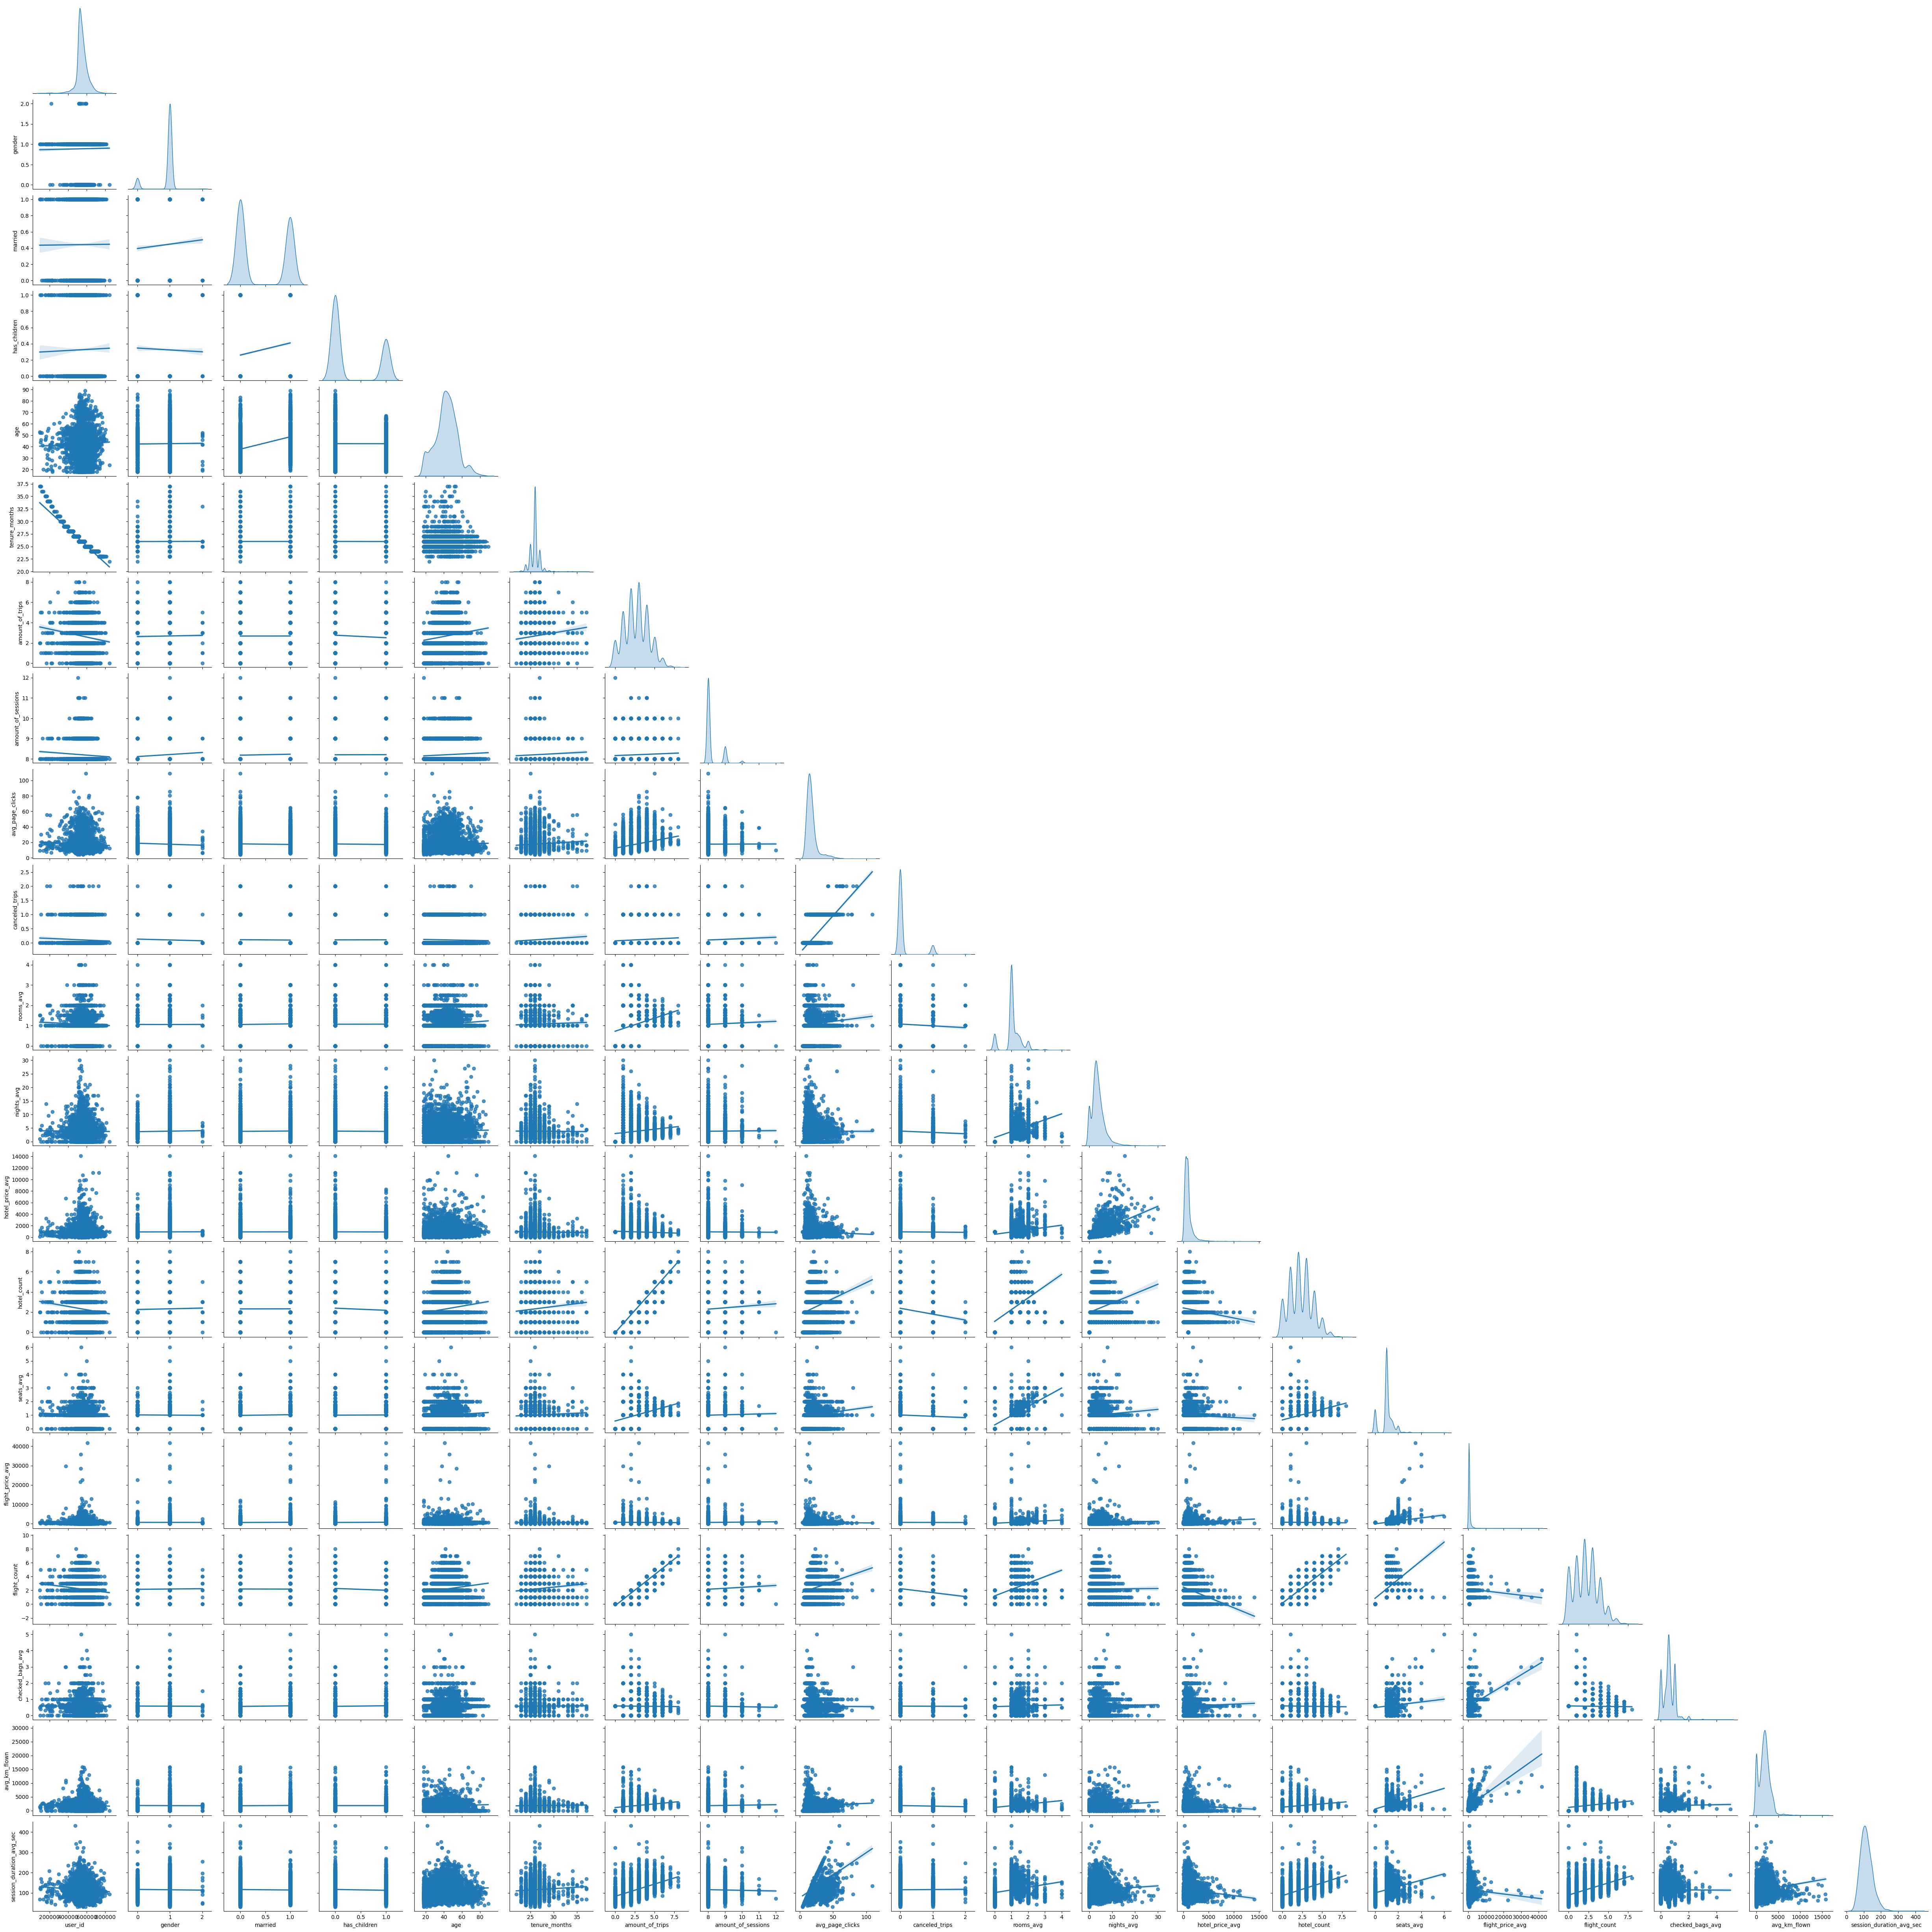

In [ ]:
sns.pairplot(customers, corner=True, kind='reg', diag_kind='kde')

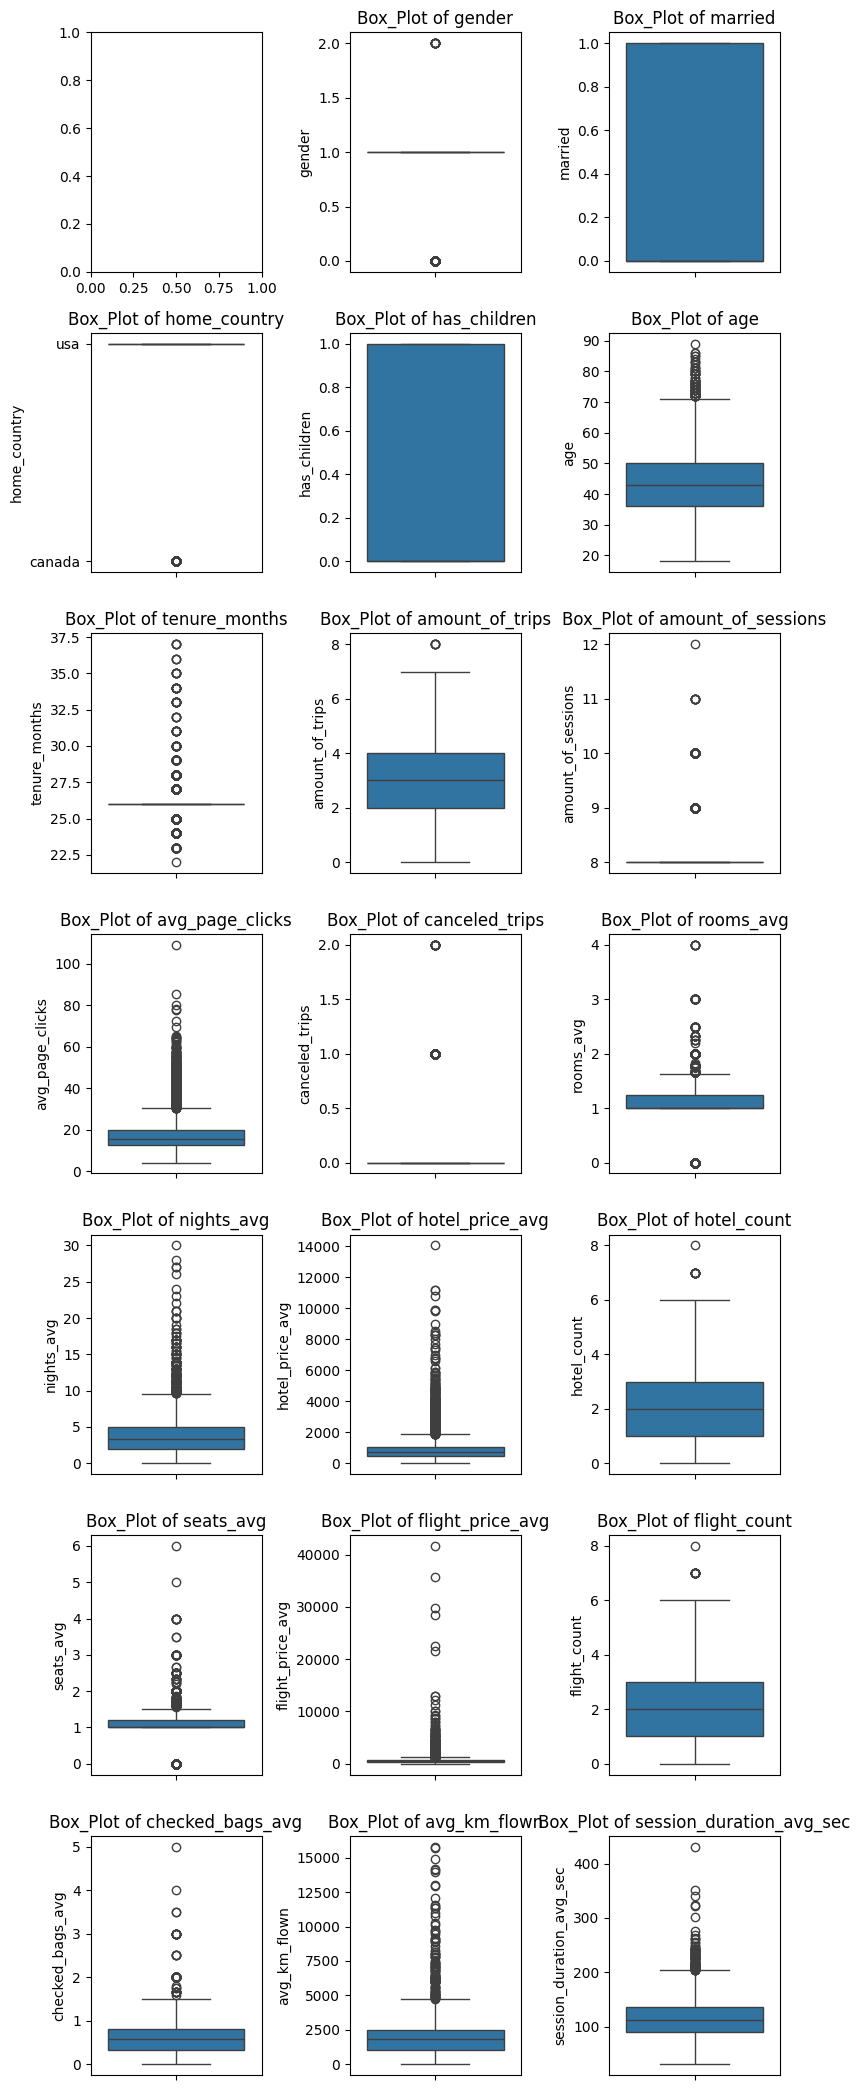

In [ ]:
#  box plot of all columns except user_id from customers using subplot

import matplotlib.pyplot as plt
# Box plot of all columns except 'user_id' using subplots
num_cols = len(customers.columns) - 1  # Exclude 'user_id'
num_rows = (num_cols + 2) // 3  # Calculate number of rows for subplots (3 columns per row)

fig, axes = plt.subplots(num_rows, 3, figsize=(8, 3 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, col in enumerate(customers.columns):
    if col != 'user_id':
        sns.boxplot(data=customers, y=col, ax=axes[i])
        axes[i].set_title(f'Box_Plot of {col}')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()
# outliers in age columns, after age 70



# **Pre_processing before K-Means clustering**

**1. Setting outlier threshold at 5 times of IQR**

In [ ]:
# from customers dataset setting outlier threshold at 5 times IQR for the following columns: 'avg_page_clicks',  'rooms_avg','nights_avg','hotel_price_avg','seats_avg','flight_price_avg','avg_km_flown','session_duration_avg_sec'  and return the update dataset as customers_no_outlier.and make another dataset name customers_outlier for outliers more than 5 times of IQR

import pandas as pd
def remove_outliers_iqr(df, columns, threshold=1.5):
    df_no_outliers = df.copy()
    df_outliers = pd.DataFrame()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Identify outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        df_outliers = pd.concat([df_outliers, outliers])

        # Remove outliers from the DataFrame
        df_no_outliers = df_no_outliers[~((df_no_outliers[col] < lower_bound) | (df_no_outliers[col] > upper_bound))]
    return df_no_outliers.drop_duplicates(), df_outliers.drop_duplicates()

columns_to_check = ['avg_page_clicks', 'rooms_avg', 'nights_avg', 'hotel_price_avg',
                   'seats_avg', 'flight_price_avg', 'avg_km_flown', 'session_duration_avg_sec']

customers_no_outlier, customers_outlier = remove_outliers_iqr(customers, columns_to_check, threshold=5)
print(customers_no_outlier.shape, customers_outlier.shape)

(4585, 21) (1197, 21)


In [ ]:
customers_no_outlier

user_id  gender  married home_country  has_children  age  tenure_months  \
0      531931       1    False          usa         False   40             26   
1      611065       1    False          usa         False   43             25   
2      229330       1     True          usa         False   48             33   
3      586762       1    False       canada         False   37             25   
4      536035       0    False          usa         False   29             26   
...       ...     ...      ...          ...           ...  ...            ...   
5777   521235       1    False          usa         False   35             26   
5778   591155       0     True       canada         False   42             25   
5779   600351       1     True          usa         False   48             25   
5780   577044       1     True          usa          True   55             26   
5781   597300       1     True          usa          True   37             25   

      amount_of_trips  amount_of_sessions  avg_page_clicks  ...  rooms_avg  \
0                   2                   8         9.375000  ...   1.500000   
1                   4                   8        19.875000  ...   1.500000   
2                   4                   8        16.125000  ...   1.750000   
3                   3                   8        15.750000  ...   1.333333   
4                   2                   8        13.875000  ...   1.500000   
...               ...                 ...              ...  ...        ...   
5777                5                   8        24.250000  ...   1.600000   
5778                2                   8        15.500000  ...   1.000000   
5779                2                   8        15.000000  ...   1.000000   
5780                3                   9        20.333333  ...   1.000000   
5781                2                   8        11.375000  ...   1.500000   

      nights_avg  hotel_price_avg  hotel_count  seats_avg  flight_price_avg  \
0       3.500000       714.000000          2.0   1.500000       1676.630000   
1       2.250000       677.750000          4.0   1.500000       1790.872500   
2       2.000000      1028.500000          4.0   1.750000        720.802500   
3       7.333333      2140.666667          3.0   1.333333        762.496667   
4       1.500000       291.000000          2.0   1.500000        931.700000   
...          ...              ...          ...        ...               ...   
5777    5.400000       918.200000          5.0   1.800000       1541.054000   
5778    4.000000       541.500000          2.0   1.000000        546.350000   
5779    5.000000      1300.000000          1.0   1.000000        523.340000   
5780    1.000000       270.500000          2.0   1.333333        449.743333   
5781    8.000000      2365.000000          2.0   1.500000        486.595000   

      flight_count  checked_bags_avg  avg_km_flown  session_duration_avg_sec  
0              2.0          0.500000   3238.749749                 70.875000  
1              4.0          0.750000   3342.929238                146.750000  
2              4.0          0.250000   1201.119453                119.625000  
3              3.0          0.333333   2818.710430                116.375000  
4              2.0          0.500000   1484.887202                102.750000  
...            ...               ...           ...                       ...  
5777           5.0          1.200000   2816.228255                179.875000  
5778           1.0          1.000000   3163.054440                115.125000  
5779           2.0          0.500000   3121.115690                112.500000  
5780           3.0          0.333333   1193.525629                150.111111  
5781           2.0          0.000000   1494.297709                 83.750000  

[4585 rows x 21 columns]

In [ ]:
customers_no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4585 entries, 0 to 5781
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   4585 non-null   int64  
 1   gender                    4585 non-null   int64  
 2   married                   4585 non-null   bool   
 3   home_country              4585 non-null   object 
 4   has_children              4585 non-null   bool   
 5   age                       4585 non-null   int64  
 6   tenure_months             4585 non-null   int64  
 7   amount_of_trips           4585 non-null   int64  
 8   amount_of_sessions        4585 non-null   int64  
 9   avg_page_clicks           4585 non-null   float64
 10  canceled_trips            4585 non-null   float64
 11  rooms_avg                 4585 non-null   float64
 12  nights_avg                4585 non-null   float64
 13  hotel_price_avg           4585 non-null   float64
 14  hotel_count  

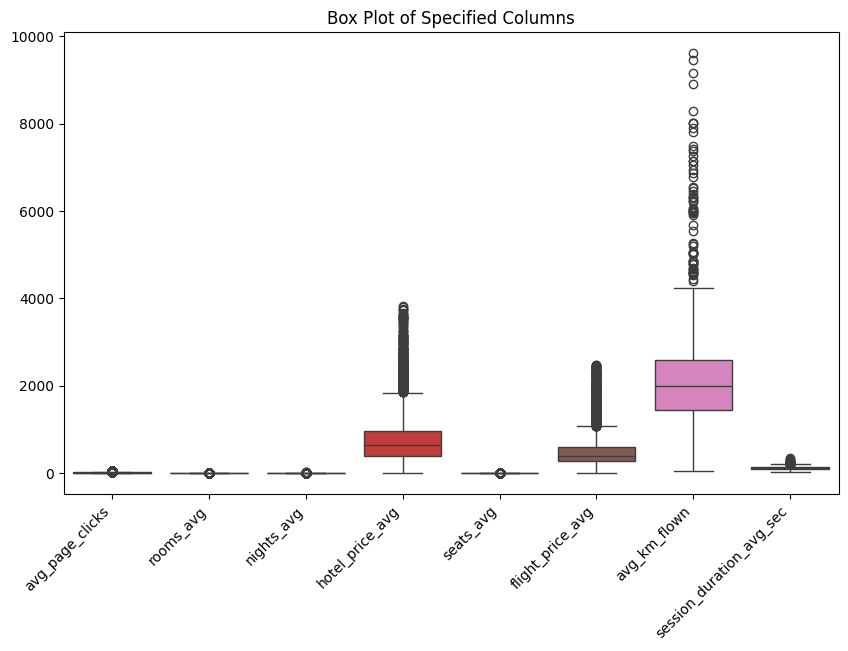

In [ ]:
# box plot  after setting outlier threshold  5 times of IQR

import matplotlib.pyplot as plt
# Box plot of specified columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=customers_no_outlier[columns_to_check])
plt.title('Box Plot of Specified Columns')
plt.xticks(rotation=45, ha='right')
plt.show()


**Group 1: Customres_outlier (> 5times IQR)**

In [ ]:
print(customers_outlier.info())
customers_outlier.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 1197 entries, 211 to 5393
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   1197 non-null   int64  
 1   gender                    1197 non-null   int64  
 2   married                   1197 non-null   bool   
 3   home_country              1197 non-null   object 
 4   has_children              1197 non-null   bool   
 5   age                       1197 non-null   int64  
 6   tenure_months             1197 non-null   int64  
 7   amount_of_trips           1197 non-null   int64  
 8   amount_of_sessions        1197 non-null   int64  
 9   avg_page_clicks           1197 non-null   float64
 10  canceled_trips            1197 non-null   float64
 11  rooms_avg                 1197 non-null   float64
 12  nights_avg                1197 non-null   float64
 13  hotel_price_avg           1197 non-null   float64
 14  hotel_count

user_id       gender          age  tenure_months  \
count    1197.000000  1197.000000  1197.000000    1197.000000   
mean   554459.536341     0.891395    40.413534      25.893066   
std     67571.581296     0.319230    18.388148       1.207665   
min    106907.000000     0.000000    18.000000      22.000000   
25%    521211.000000     1.000000    24.000000      25.000000   
50%    547693.000000     1.000000    37.000000      26.000000   
75%    586357.000000     1.000000    54.000000      26.000000   
max    844489.000000     2.000000    89.000000      37.000000   

       amount_of_trips  amount_of_sessions  avg_page_clicks  canceled_trips  \
count      1197.000000         1197.000000      1197.000000     1197.000000   
mean          1.126149            8.201337        16.510227        0.170426   
std           1.211688            0.457635        12.160638        0.401953   
min           0.000000            8.000000         4.125000        0.000000   
25%           0.000000            8.000000         9.750000        0.000000   
50%           1.000000            8.000000        12.375000        0.000000   
75%           2.000000            8.000000        17.625000        0.000000   
max           8.000000           12.000000       109.125000        2.000000   

         rooms_avg   nights_avg  hotel_price_avg  hotel_count    seats_avg  \
count  1197.000000  1197.000000      1197.000000  1197.000000  1197.000000   
mean      0.810081     3.717777      1460.121474     0.862991     0.442126   
std       0.880265     4.786911      1489.852203     1.027844     0.902468   
min       0.000000     0.000000         0.000000     0.000000     0.000000   
25%       0.000000     0.000000       928.610853     0.000000     0.000000   
50%       1.000000     2.000000       928.610853     1.000000     0.000000   
75%       1.500000     6.000000      1382.333333     1.000000     0.000000   
max       4.000000    30.000000     14057.000000     7.000000     6.000000   

       flight_price_avg  flight_count  checked_bags_avg  avg_km_flown  \
count       1197.000000   1197.000000       1197.000000   1197.000000   
mean        1290.784710      0.456140          0.620291    817.102232   
std         2527.914856      0.992845          0.358582   2086.610320   
min           41.280000      0.000000          0.000000      0.000000   
25%          677.675536      0.000000          0.579303      0.000000   
50%          677.675536      0.000000          0.579303      0.000000   
75%          677.675536      0.000000          0.579303      0.000000   
max        41666.050000      8.000000          5.000000  15813.840702   

       session_duration_avg_sec  
count               1197.000000  
mean                  95.408400  
std                   38.042032  
min                   30.666667  
25%                   70.125000  
50%                   88.375000  
75%                  110.600000  
max                  431.333333

In [ ]:
customers_outlier.head(5)

user_id  gender  married home_country  has_children  age  tenure_months  \
211    690420       1     True          usa          True   56             24   
917    458479       1    False          usa         False   46             27   
1176   487453       1    False          usa         False   43             27   
1576   497077       1    False          usa         False   43             27   
1600   514300       0    False          usa         False   41             27   

      amount_of_trips  amount_of_sessions  avg_page_clicks  ...  rooms_avg  \
211                 4                   8           57.500  ...       1.00   
917                 4                   8           85.625  ...       1.00   
1176                6                   8           63.250  ...       1.25   
1576                4                   8           69.750  ...       1.00   
1600                3                   8           77.750  ...       1.00   

      nights_avg  hotel_price_avg  hotel_count  seats_avg  flight_price_avg  \
211     3.666667            353.0          3.0        1.0           548.160   
917     7.500000           1416.0          2.0        1.0           441.300   
1176    5.250000           1102.5          4.0        1.2           439.544   
1576    3.000000            691.0          2.0        1.0           438.225   
1600    2.000000            200.0          1.0        1.0           346.755   

      flight_count  checked_bags_avg  avg_km_flown  session_duration_avg_sec  
211            3.0               0.0   3102.200839                140.166667  
917            1.0               1.0   2257.593212                247.250000  
1176           5.0               0.4   1714.984130                242.500000  
1576           2.0               0.5   2575.337576                174.000000  
1600           2.0               1.0   2262.288963                182.166667  

[5 rows x 21 columns]

**Group 1 (customer_outlier)**

1. High-Value Travelers

* Spending huge amounts on flights and hotels.
* Possibly frequent business or luxury travelers.
* These users might be a distinct high-revenue segment.

2. Engaged Users

* avg_page_clicks of 109+ compared to 17 at Q3 — very engaged online behavior.
* Likely research-heavy buyers or planners.

3. Frequent / Group Travelers

* Higher counts in seats_avg, flight_count, and checked_bags_avg.
* Possibly people booking for families or groups, or who travel often.
* This segment is likely low in number but extremely high in value. Losing one of them can hurt revenue more than losing 10+ average users.

**Segment Name: 'Elite'**

**Suggested Perks**

🥇 Loyalty & Recognition

	*	Exclusive “Elite Globetrotter” badge or tier in the app.
	*	Personalized thank-you notes or surprise gifts after milestones.

✈️ Premium Travel Perks

	* Free checked bags, priority boarding (if applicable).
	* Access to VIP lounge deals or upgrades.

💰 High-Value Offers

	* Concierge booking services.
	* Access to luxury packages not shown to regular users.
	* Early access to premium sales or invites to private deals.

🤝 Personalized Experience

	* Assign a dedicated customer success rep or travel assistant.
	* Tailored suggestions for luxury hotels, business-class flights, or long-haul routes.


🧑‍💻 Engagement Programs

	*	Invite to beta features or loyalty programs.
	*	Feedback surveys with reward incentives (you clearly trust their experience).


**2. converting some columns to numerical type (encoding)**

In [ ]:
# drop user_id
pre_process_data = customers_no_outlier.copy()
pre_process_data = pre_process_data.drop(['user_id'], axis=1)
# mapping the married column (bool type)
pre_process_data['married'] = pre_process_data['married'].map({True:1,False:0})
# mapping the has_children column (bool type)
pre_process_data['has_children'] = pre_process_data['has_children'].map({True:1,False:0})
# convert home_country to numeric (usa 0,canada 1)
pre_process_data[ "home_country"] = (pre_process_data[ "home_country"] == 'canada').astype("int")
# gender already numerical 1 = F,0 = M, 2 = O



pre_process_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4585 entries, 0 to 5781
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    4585 non-null   int64  
 1   married                   4585 non-null   int64  
 2   home_country              4585 non-null   int64  
 3   has_children              4585 non-null   int64  
 4   age                       4585 non-null   int64  
 5   tenure_months             4585 non-null   int64  
 6   amount_of_trips           4585 non-null   int64  
 7   amount_of_sessions        4585 non-null   int64  
 8   avg_page_clicks           4585 non-null   float64
 9   canceled_trips            4585 non-null   float64
 10  rooms_avg                 4585 non-null   float64
 11  nights_avg                4585 non-null   float64
 12  hotel_price_avg           4585 non-null   float64
 13  hotel_count               4585 non-null   float64
 14  seats_avg    

In [ ]:
pre_process_data.describe()

gender      married  home_country  has_children          age  \
count  4585.000000  4585.000000   4585.000000   4585.000000  4585.000000   
mean      0.888332     0.451036      0.172301      0.319738    43.224209   
std       0.320485     0.497651      0.377683      0.466426     9.653752   
min       0.000000     0.000000      0.000000      0.000000    18.000000   
25%       1.000000     0.000000      0.000000      0.000000    38.000000   
50%       1.000000     0.000000      0.000000      0.000000    43.000000   
75%       1.000000     1.000000      0.000000      1.000000    50.000000   
max       2.000000     1.000000      1.000000      1.000000    83.000000   

       tenure_months  amount_of_trips  amount_of_sessions  avg_page_clicks  \
count    4585.000000      4585.000000         4585.000000      4585.000000   
mean       26.022246         3.083097            8.204798        17.880412   
std         1.138886         1.318527            0.460645         7.643409   
min        23.000000         1.000000            8.000000         6.125000   
25%        26.000000         2.000000            8.000000        13.250000   
50%        26.000000         3.000000            8.000000        16.125000   
75%        26.000000         4.000000            8.000000        19.875000   
max        37.000000         8.000000           11.000000        55.500000   

       canceled_trips    rooms_avg   nights_avg  hotel_price_avg  hotel_count  \
count     4585.000000  4585.000000  4585.000000      4585.000000  4585.000000   
mean         0.083969     1.134344     3.847294       789.850065     2.690513   
std          0.279722     0.310873     2.176257       579.296967     1.305265   
min          0.000000     0.000000     0.000000         0.000000     0.000000   
25%          0.000000     1.000000     2.500000       399.000000     2.000000   
50%          0.000000     1.000000     3.500000       639.000000     3.000000   
75%          0.000000     1.250000     5.000000       978.000000     4.000000   
max          2.000000     2.500000    18.000000      3832.000000     8.000000   

         seats_avg  flight_price_avg  flight_count  checked_bags_avg  \
count  4585.000000       4585.000000   4585.000000       4585.000000   
mean      1.139522        517.611920      2.640349          0.568602   
std       0.261617        397.789359      1.286758          0.433531   
min       1.000000          8.170000      1.000000          0.000000   
25%       1.000000        282.773333      2.000000          0.250000   
50%       1.000000        402.980000      3.000000          0.500000   
75%       1.250000        601.710000      3.000000          1.000000   
max       2.000000       2487.258000      7.000000          3.500000   

       avg_km_flown  session_duration_avg_sec  
count   4585.000000               4585.000000  
mean    2089.296873                120.458403  
std      992.305807                 33.244720  
min       47.744509                 38.833333  
25%     1442.319713                 97.125000  
50%     1989.169036                116.625000  
75%     2595.636298                139.625000  
max     9609.572630                351.000000

In [ ]:
pre_process_data

gender  married  home_country  has_children  age  tenure_months  \
0          1        0             0             0   40             26   
1          1        0             0             0   43             25   
2          1        1             0             0   48             33   
3          1        0             1             0   37             25   
4          0        0             0             0   29             26   
...      ...      ...           ...           ...  ...            ...   
5777       1        0             0             0   35             26   
5778       0        1             1             0   42             25   
5779       1        1             0             0   48             25   
5780       1        1             0             1   55             26   
5781       1        1             0             1   37             25   

      amount_of_trips  amount_of_sessions  avg_page_clicks  canceled_trips  \
0                   2                   8         9.375000             0.0   
1                   4                   8        19.875000             0.0   
2                   4                   8        16.125000             0.0   
3                   3                   8        15.750000             0.0   
4                   2                   8        13.875000             0.0   
...               ...                 ...              ...             ...   
5777                5                   8        24.250000             0.0   
5778                2                   8        15.500000             0.0   
5779                2                   8        15.000000             0.0   
5780                3                   9        20.333333             0.0   
5781                2                   8        11.375000             0.0   

      rooms_avg  nights_avg  hotel_price_avg  hotel_count  seats_avg  \
0      1.500000    3.500000       714.000000          2.0   1.500000   
1      1.500000    2.250000       677.750000          4.0   1.500000   
2      1.750000    2.000000      1028.500000          4.0   1.750000   
3      1.333333    7.333333      2140.666667          3.0   1.333333   
4      1.500000    1.500000       291.000000          2.0   1.500000   
...         ...         ...              ...          ...        ...   
5777   1.600000    5.400000       918.200000          5.0   1.800000   
5778   1.000000    4.000000       541.500000          2.0   1.000000   
5779   1.000000    5.000000      1300.000000          1.0   1.000000   
5780   1.000000    1.000000       270.500000          2.0   1.333333   
5781   1.500000    8.000000      2365.000000          2.0   1.500000   

      flight_price_avg  flight_count  checked_bags_avg  avg_km_flown  \
0          1676.630000           2.0          0.500000   3238.749749   
1          1790.872500           4.0          0.750000   3342.929238   
2           720.802500           4.0          0.250000   1201.119453   
3           762.496667           3.0          0.333333   2818.710430   
4           931.700000           2.0          0.500000   1484.887202   
...                ...           ...               ...           ...   
5777       1541.054000           5.0          1.200000   2816.228255   
5778        546.350000           1.0          1.000000   3163.054440   
5779        523.340000           2.0          0.500000   3121.115690   
5780        449.743333           3.0          0.333333   1193.525629   
5781        486.595000           2.0          0.000000   1494.297709   

      session_duration_avg_sec  
0                    70.875000  
1                   146.750000  
2                   119.625000  
3                   116.375000  
4                   102.750000  
...                        ...  
5777                179.875000  
5778                115.125000  
5779                112.500000  
5780                150.111111  
5781                 83.750000  

[4585 rows x 20 columns]

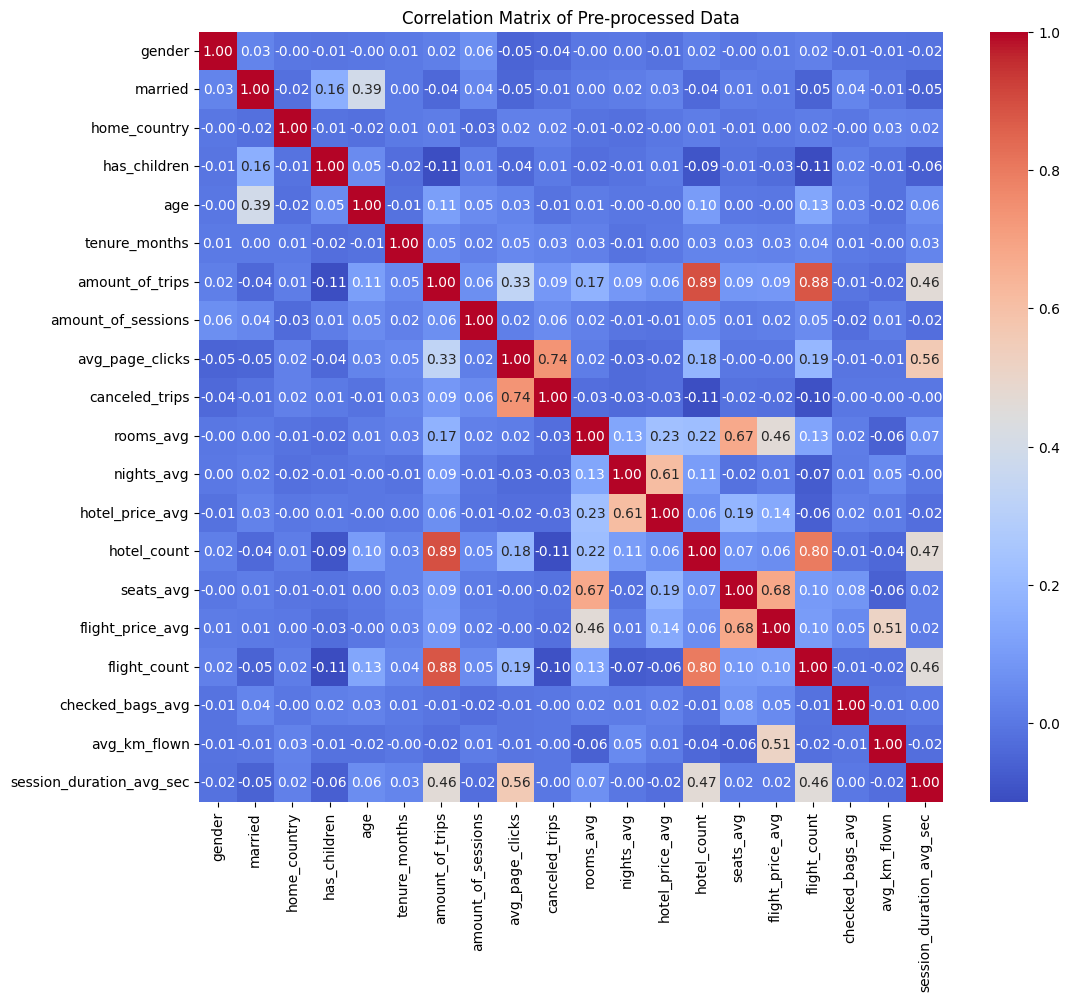

In [ ]:
# plot correlation matrix with pre_process_data

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(pre_process_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Pre-processed Data')
plt.show()



**Summary of Correlation Matrix**

✈️ **Travel Behavior Clusters**

These features group together based on strong mutual correlations, indicating similar travel patterns:

	amount_of_trips:
	•	Highly correlated with hotel_count (0.89), flight_count (0.88), and amount_of_sessions (0.60).
	•	Suggests: frequent travelers are active online and tend to book both hotels and flights.

	hotel_count & nights_avg: (0.80)
	•	More hotel bookings often mean longer stays — no surprise, but reinforces trip planning logic.

	flight_count & avg_km_flown: (0.82)
	•	Indicates that frequent fliers usually take long-distance trips (possibly international).

	seats_avg correlated with flight_count (0.68) and hotel_count (0.67)
	•	Likely group or family travel — more bookings per trip.

	flight_price_avg and hotel_price_avg are moderately correlated (0.23).
	•	Some users consistently book high-end travel options.
📲 **User Engagement**

Variables linked to how actively a user interacts with the platform:

	avg_page_clicks has:
	•	Moderate correlation with amount_of_sessions (0.74) and session_duration_avg_sec (0.56).
	•	Suggests: more sessions = more clicks = longer engagement.
	session_duration_avg_sec also correlates moderately with:
	•	amount_of_trips (0.46), flight_count (0.46), and hotel_count (0.47).
	•	This implies engaged users are more likely to book travel.
	Takeaway: Engagement signals (clicks, duration) predict travel activity and could be used as early indicators in personalization or funnel targeting.

⚠️ **Cancellations Warning**

Spotting behavior that might be predictive of cancellations:

	canceled_trips is:
	•	Strongly correlated with amount_of_sessions (0.60) and avg_page_clicks (0.56).
	•	Suggests indecisive or exploratory users may click around and visit often before canceling trips.
	Weak or negative correlation with bookings like flight_count and hotel_count — indicates these users are less likely to follow through with actual purchases.
	Possible Strategy: Monitor users with high session counts and clicks but low booking conversion — these may need better support, clearer pricing, or more trust-building.
🧑‍🤝‍🧑 **Demographics Weakly Related**

Demographic variables show low correlation with behavioral or engagement features:

	Very low correlations with most features — demographics seem weakly predictive of travel behavior in this dataset.
	Exceptions:
	•	age vs. tenure_months: 0.39 — older users may be longer-term users.
	•	gender, married, has_children — correlations < 0.1 across the board.
	Implication: Travel behavior and engagement aren’t heavily driven by basic demographics, so clustering/segmentation should rely more on behavioral data.

**Groups found in EDA of user_features**

**Group 1 (coustomers_outliers)** is found earlier. **Group 2 (who canceles trips)** and **Group 3** ( graduation trips, people of **18-19 age**, they have higher count) are discovered below.

In [ ]:
group_cancelled_trips = pre_process_data[pre_process_data['canceled_trips'] !=0].copy() # Group cancelled the trips
pre_process_data = pre_process_data[pre_process_data['canceled_trips'] == 0].copy() # Group did not cancel the trips
pre_process_data.drop (columns=['canceled_trips'], inplace=True) # Dropping cause based on cancel_trip we make one group, so drop before clustering

group_graduation_trip = pre_process_data[pre_process_data['age'] <= 19] .copy() # Group age 18, 19
pre_process_data = pre_process_data[pre_process_data['age'] > 19 ].copy()
pre_process_data # this will be used for scaling, PCA and Clustering

gender  married  home_country  has_children  age  tenure_months  \
0          1        0             0             0   40             26   
1          1        0             0             0   43             25   
2          1        1             0             0   48             33   
3          1        0             1             0   37             25   
4          0        0             0             0   29             26   
...      ...      ...           ...           ...  ...            ...   
5777       1        0             0             0   35             26   
5778       0        1             1             0   42             25   
5779       1        1             0             0   48             25   
5780       1        1             0             1   55             26   
5781       1        1             0             1   37             25   

      amount_of_trips  amount_of_sessions  avg_page_clicks  rooms_avg  \
0                   2                   8         9.375000   1.500000   
1                   4                   8        19.875000   1.500000   
2                   4                   8        16.125000   1.750000   
3                   3                   8        15.750000   1.333333   
4                   2                   8        13.875000   1.500000   
...               ...                 ...              ...        ...   
5777                5                   8        24.250000   1.600000   
5778                2                   8        15.500000   1.000000   
5779                2                   8        15.000000   1.000000   
5780                3                   9        20.333333   1.000000   
5781                2                   8        11.375000   1.500000   

      nights_avg  hotel_price_avg  hotel_count  seats_avg  flight_price_avg  \
0       3.500000       714.000000          2.0   1.500000       1676.630000   
1       2.250000       677.750000          4.0   1.500000       1790.872500   
2       2.000000      1028.500000          4.0   1.750000        720.802500   
3       7.333333      2140.666667          3.0   1.333333        762.496667   
4       1.500000       291.000000          2.0   1.500000        931.700000   
...          ...              ...          ...        ...               ...   
5777    5.400000       918.200000          5.0   1.800000       1541.054000   
5778    4.000000       541.500000          2.0   1.000000        546.350000   
5779    5.000000      1300.000000          1.0   1.000000        523.340000   
5780    1.000000       270.500000          2.0   1.333333        449.743333   
5781    8.000000      2365.000000          2.0   1.500000        486.595000   

      flight_count  checked_bags_avg  avg_km_flown  session_duration_avg_sec  
0              2.0          0.500000   3238.749749                 70.875000  
1              4.0          0.750000   3342.929238                146.750000  
2              4.0          0.250000   1201.119453                119.625000  
3              3.0          0.333333   2818.710430                116.375000  
4              2.0          0.500000   1484.887202                102.750000  
...            ...               ...           ...                       ...  
5777           5.0          1.200000   2816.228255                179.875000  
5778           1.0          1.000000   3163.054440                115.125000  
5779           2.0          0.500000   3121.115690                112.500000  
5780           3.0          0.333333   1193.525629                150.111111  
5781           2.0          0.000000   1494.297709                 83.750000  

[4124 rows x 19 columns]

 **Rest** of groups can be found via clustering method.

In [ ]:
print(group_cancelled_trips.shape)
print(group_cancelled_trips.mean())
group_cancelled_trips # (Group 2)

(382, 20)
gender                         0.850785
married                        0.431937
home_country                   0.201571
has_children                   0.335079
age                           42.845550
tenure_months                 26.123037
amount_of_trips                3.476440
amount_of_sessions             8.290576
avg_page_clicks               36.528400
canceled_trips                 1.007853
rooms_avg                      1.108813
nights_avg                     3.615838
hotel_price_avg              737.042517
hotel_count                    2.227749
seats_avg                      1.125654
flight_price_avg             494.957144
flight_count                   2.225131
checked_bags_avg               0.562790
avg_km_flown                2088.164908
session_duration_avg_sec     120.042795
dtype: float64


gender  married  home_country  has_children  age  tenure_months  \
12         1        0             0             0   35             26   
18         1        0             0             0   27             26   
36         1        0             0             0   37             26   
48         0        0             0             0   44             24   
51         0        1             0             1   46             26   
...      ...      ...           ...           ...  ...            ...   
5669       1        1             0             0   49             26   
5721       1        1             0             1   44             26   
5737       1        0             0             0   28             25   
5745       1        0             0             0   50             28   
5750       1        0             0             0   18             26   

      amount_of_trips  amount_of_sessions  avg_page_clicks  canceled_trips  \
12                  3                   8           51.375             1.0   
18                  3                   8           22.000             1.0   
36                  3                   8           52.500             1.0   
48                  5                   8           49.250             1.0   
51                  3                   8           46.375             1.0   
...               ...                 ...              ...             ...   
5669                3                   8           42.375             1.0   
5721                4                   8           37.875             1.0   
5737                3                   8           39.625             1.0   
5745                3                   8           42.875             2.0   
5750                2                   8           23.000             1.0   

      rooms_avg  nights_avg  hotel_price_avg  hotel_count  seats_avg  \
12          1.0    3.000000       363.000000          2.0        1.0   
18          1.0    2.500000       532.000000          2.0        1.0   
36          1.0    4.000000       138.000000          2.0        1.0   
48          1.0    6.000000       623.750000          4.0        1.0   
51          1.0    7.500000      1549.000000          2.0        1.0   
...         ...         ...              ...          ...        ...   
5669        1.5    2.000000       303.000000          2.0        1.0   
5721        1.0    2.333333       308.333333          3.0        1.0   
5737        2.0    4.000000      2032.000000          2.0        2.0   
5745        1.0    6.000000      1884.000000          1.0        1.0   
5750        1.0    3.000000       219.000000          1.0        1.0   

      flight_price_avg  flight_count  checked_bags_avg  avg_km_flown  \
12          199.485000           2.0          1.000000   1146.002804   
18          420.600000           2.0          0.000000   2376.794635   
36          461.700000           2.0          0.000000   2605.504214   
48          301.685000           2.0          0.500000   1692.017292   
51          404.780000           2.0          0.000000   2329.726353   
...                ...           ...               ...           ...   
5669        210.480000           1.0          1.000000   1107.703566   
5721        368.476667           3.0          0.666667   2295.219620   
5737        626.460000           2.0          0.000000    674.050038   
5745        262.410000           1.0          1.000000   1515.635717   
5750         98.170000           1.0          1.000000    495.722923   

      session_duration_avg_sec  
12                  158.333333  
18                  119.166667  
36                  104.833333  
48                  133.166667  
51                  179.500000  
...                        ...  
5669                148.166667  
5721                151.333333  
5737                129.000000  
5745                157.250000  
5750                 65.333333  

[382 rows x 20 columns]

**Group 2 (Cancelled_trips)**

This group (group_cancelled_trips) describes users who have an average of about 1 canceled trips

* Frequent cancellers are often active users (higher travel,active on platform, engaged on page clicks, session duration) , suggesting they may book impulsively or frequently change plans due to exploration habits.

* These users are not budget travelers (multi booking users). They tend to make more bookings and spend more, which may result in higher cancellation rates due to more complex itineraries.

* Cancellers often book long-distance or international flights, where plans may be more prone to changes or uncertainties.

* While demographics (gender, children, married, age, tenure_minth) show some variation, they are not strongly correlated with cancellations (as seen in the heatmap). Age and tenure suggest mature, experienced users.

**🏷️ Segment Name: “Cautious Loyalists”**

These are long-term, thoughtful users who frequently browse and book — but cancel when unsure. They’re valuable, but need more confidence and flexibility to convert.

**🎁 Suggested Perks to Engage & Retain**

 ✅ No Cancellation Fees

 🔁 Rebooking Credits

 🕒 Flexible Booking Options

 🛏️ Free Hotel Meal / Early Check-in

 💬 Travel Assistant / Concierge Chat


In [ ]:
print(group_graduation_trip.shape)
print(group_graduation_trip.mean())
group_graduation_trip # (Group 3)

(79, 19)
gender                         0.911392
married                        0.000000
home_country                   0.189873
has_children                   0.240506
age                           18.392405
tenure_months                 26.037975
amount_of_trips                1.721519
amount_of_sessions             8.215190
avg_page_clicks               13.671941
rooms_avg                      1.107595
nights_avg                     3.943038
hotel_price_avg              811.768271
hotel_count                    1.556962
seats_avg                      1.156118
flight_price_avg             615.994093
flight_count                   1.291139
checked_bags_avg               0.535865
avg_km_flown                2579.449389
session_duration_avg_sec     102.019198
dtype: float64


gender  married  home_country  has_children  age  tenure_months  \
108        1        0             0             0   18             26   
171        1        0             1             0   18             26   
189        1        0             0             0   18             26   
218        1        0             0             0   19             33   
407        1        0             0             0   18             26   
...      ...      ...           ...           ...  ...            ...   
5442       1        0             0             0   19             26   
5487       1        0             0             0   19             26   
5507       1        0             0             1   18             27   
5509       1        0             0             0   18             26   
5764       0        0             0             1   18             26   

      amount_of_trips  amount_of_sessions  avg_page_clicks  rooms_avg  \
108                 3                   8           12.875        1.0   
171                 1                   8           11.625        1.0   
189                 2                   8           10.875        1.0   
218                 2                   8           12.500        1.0   
407                 1                   8           21.625        1.0   
...               ...                 ...              ...        ...   
5442                1                   8           11.000        1.0   
5487                1                   8            9.750        1.0   
5507                2                   8           10.375        1.5   
5509                2                   8           13.750        1.0   
5764                1                   8           21.625        1.0   

      nights_avg  hotel_price_avg  hotel_count  seats_avg  flight_price_avg  \
108          0.0              0.0          1.0        1.0        604.726667   
171          2.0            292.0          1.0        1.0        540.810000   
189          8.0           1572.0          2.0        1.0        184.450000   
218         11.0           2343.0          1.0        1.0        237.100000   
407          5.0            260.0          1.0        1.0        766.310000   
...          ...              ...          ...        ...               ...   
5442         4.0           1284.0          1.0        1.0        380.040000   
5487         5.0            455.0          1.0        1.0        246.330000   
5507         4.0            558.0          2.0        1.0        295.390000   
5509         4.0           1140.0          1.0        1.0        653.230000   
5764         3.0            492.0          1.0        1.0        571.030000   

      flight_count  checked_bags_avg  avg_km_flown  session_duration_avg_sec  
108            3.0               0.0   3333.243216                    96.375  
171            1.0               0.0   3122.442028                    85.875  
189            1.0               1.0   1029.243461                    80.625  
218            1.0               1.0   1391.584117                    93.875  
407            1.0               1.0   3974.209843                   162.500  
...            ...               ...           ...                       ...  
5442           1.0               0.0   2265.463532                    81.875  
5487           1.0               1.0   1308.349329                    72.250  
5507           1.0               0.0   3457.787343                    78.250  
5509           2.0               0.5   3547.019306                   102.875  
5764           1.0               0.0   3027.168408                   160.750  

[79 rows x 19 columns]

**Group 3 (youth: age of 18-19)**

* This group appears to represent younger travelers, likely students or recent graduates planning celebratory or milestone trips.

* This group is youthful, single, and travel-savvy, likely planning once-in-a-lifetime trips (e.g., post-graduation celebrations, gap year travel).

* Despite fewer trips, they spend big on flights and hotels and travel far.

* Their online engagement is high, indicating interest in deals, destinations, and comparing options.

**🏷️ Segment Name: “Memory Makers”**

Young users booking meaningful, often first-time or milestone trips

**🎁 Suggested Perks for “Memory Makers”**

🌟 1-Night Free Hotel with Flight

💼  Free Checked Bag

💳  Student/Youth Discount

**3. Scaling features**

In [ ]:
scaler=StandardScaler()
pre_process_scaled=scaler.fit_transform(pre_process_data)
pre_process_scaled

array([[ 0.34231082, -0.9256464 , -0.45137139, ..., -0.16185279,
         1.19157011, -1.51502655],
       [ 0.34231082, -0.9256464 , -0.45137139, ...,  0.4181187 ,
         1.29870151,  0.78517061],
       [ 0.34231082,  1.08032614, -0.45137139, ..., -0.74182427,
        -0.90379612, -0.0371404 ],
       ...,
       [ 0.34231082,  1.08032614, -0.45137139, ..., -0.16185279,
         1.07060291, -0.25313915],
       [ 0.34231082,  1.08032614, -0.45137139, ..., -0.54850044,
        -0.91160512,  0.88706475],
       [ 0.34231082,  1.08032614, -0.45137139, ..., -1.32179575,
        -0.60231071, -1.12471303]])

In [ ]:
customers_scaled = pd.DataFrame(pre_process_scaled)
customers_scaled.index = pre_process_data.index
customers_scaled.columns = pre_process_data.columns
customers_scaled # scaled data in a dataframe


gender   married  home_country  has_children       age  tenure_months  \
0     0.342311 -0.925646     -0.451371     -0.685734 -0.410687      -0.011245   
1     0.342311 -0.925646     -0.451371     -0.685734 -0.080815      -0.903051   
2     0.342311  1.080326     -0.451371     -0.685734  0.468972       6.231399   
3     0.342311 -0.925646      2.215470     -0.685734 -0.740559      -0.903051   
4    -2.808783 -0.925646     -0.451371     -0.685734 -1.620217      -0.011245   
...        ...       ...           ...           ...       ...            ...   
5777  0.342311 -0.925646     -0.451371     -0.685734 -0.960473      -0.011245   
5778 -2.808783  1.080326      2.215470     -0.685734 -0.190772      -0.903051   
5779  0.342311  1.080326     -0.451371     -0.685734  0.468972      -0.903051   
5780  0.342311  1.080326     -0.451371      1.458290  1.238673      -0.011245   
5781  0.342311  1.080326     -0.451371      1.458290 -0.740559      -0.903051   

      amount_of_trips  amount_of_sessions  avg_page_clicks  rooms_avg  \
0           -0.810404           -0.436381        -1.541445   1.194050   
1            0.700494           -0.436381         0.818359   1.194050   
2            0.700494           -0.436381        -0.024428   2.016900   
3           -0.054955           -0.436381        -0.108707   0.645483   
4           -0.810404           -0.436381        -0.530100   1.194050   
...               ...                 ...              ...        ...   
5777         1.455943           -0.436381         1.801610   1.523190   
5778        -0.810404           -0.436381        -0.164893  -0.451651   
5779        -0.810404           -0.436381        -0.277264  -0.451651   
5780        -0.054955            1.782650         0.921366  -0.451651   
5781        -0.810404           -0.436381        -1.091958   1.194050   

      nights_avg  hotel_price_avg  hotel_count  seats_avg  flight_price_avg  \
0      -0.168613        -0.138348    -0.577081   1.387708          2.912126   
1      -0.743065        -0.200786     0.951425   1.387708          3.199223   
2      -0.857956         0.403355     0.951425   2.352704          0.510090   
3       1.593041         2.318978     0.187172   0.744377          0.614869   
4      -1.087737        -0.866934    -0.577081   1.387708          1.040084   
...          ...              ...          ...        ...               ...   
5777    0.704554         0.213371     1.715678   2.545703          2.571418   
5778    0.061168        -0.435466    -0.577081  -0.542285          0.071683   
5779    0.520730         0.870993    -1.341335  -0.542285          0.013857   
5780   -1.317518        -0.902243    -0.577081   0.744377         -0.171094   
5781    1.899415         2.705375    -0.577081   1.387708         -0.078484   

      flight_count  checked_bags_avg  avg_km_flown  session_duration_avg_sec  
0        -0.545311         -0.161853      1.191570                 -1.515027  
1         1.002426          0.418119      1.298702                  0.785171  
2         1.002426         -0.741824     -0.903796                 -0.037140  
3         0.228558         -0.548500      0.759629                 -0.135666  
4        -0.545311         -0.161853     -0.611988                 -0.548716  
...            ...               ...           ...                       ...  
5777      1.776295          1.462067      0.757077                  1.789375  
5778     -1.319180          0.998090      1.113730                 -0.173561  
5779     -0.545311         -0.161853      1.070603                 -0.253139  
5780      0.228558         -0.548500     -0.911605                  0.887065  
5781     -0.545311         -1.321796     -0.602311                 -1.124713  

[4124 rows x 19 columns]

In [ ]:
customers_scaled.describe()

gender       married  home_country  has_children           age  \
count  4.124000e+03  4.124000e+03  4.124000e+03  4.124000e+03  4.124000e+03   
mean   2.842860e-17 -5.341131e-17 -9.303906e-17 -5.427278e-17 -2.756713e-16   
std    1.000121e+00  1.000121e+00  1.000121e+00  1.000121e+00  1.000121e+00   
min   -2.808783e+00 -9.256464e-01 -4.513714e-01 -6.857344e-01 -2.609832e+00   
25%    3.423108e-01 -9.256464e-01 -4.513714e-01 -6.857344e-01 -6.306013e-01   
50%    3.423108e-01 -9.256464e-01 -4.513714e-01 -6.857344e-01  2.914241e-02   
75%    3.423108e-01  1.080326e+00 -4.513714e-01  1.458290e+00  6.888861e-01   
max    3.493404e+00  1.080326e+00  2.215470e+00  1.458290e+00  4.317476e+00   

       tenure_months  amount_of_trips  amount_of_sessions  avg_page_clicks  \
count   4.124000e+03     4.124000e+03        4.124000e+03     4.124000e+03   
mean    8.563039e-16    -1.016538e-16       -7.968623e-16    -1.671257e-16   
std     1.000121e+00     1.000121e+00        1.000121e+00     1.000121e+00   
min    -2.686664e+00    -1.565853e+00       -4.363807e-01    -2.271860e+00   
25%    -1.124489e-02    -8.104039e-01       -4.363807e-01    -6.986578e-01   
50%    -1.124489e-02    -5.495505e-02       -4.363807e-01    -1.087070e-01   
75%    -1.124489e-02     7.004938e-01       -4.363807e-01     5.717654e-01   
max     9.798624e+00     3.722289e+00        6.220712e+00     6.942610e+00   

          rooms_avg    nights_avg  hotel_price_avg   hotel_count  \
count  4.124000e+03  4.124000e+03     4.124000e+03  4.124000e+03   
mean  -6.547193e-17  1.473118e-16     1.231906e-16  7.990160e-17   
std    1.000121e+00  1.000121e+00     1.000121e+00  1.000121e+00   
min   -3.743051e+00 -1.777080e+00    -1.368159e+00 -2.105588e+00   
25%   -4.516507e-01 -6.281749e-01    -6.742374e-01 -5.770815e-01   
50%   -4.516507e-01 -1.686131e-01    -2.517410e-01  1.871716e-01   
75%    3.711994e-01  5.207297e-01     3.232618e-01  9.514247e-01   
max    4.485450e+00  6.495034e+00     5.232172e+00  4.008437e+00   

          seats_avg  flight_price_avg  flight_count  checked_bags_avg  \
count  4.124000e+03      4.124000e+03  4.124000e+03      4.124000e+03   
mean  -2.933315e-16      1.490348e-16 -8.183991e-17     -3.028077e-16   
std    1.000121e+00      1.000121e+00  1.000121e+00      1.000121e+00   
min   -5.422851e-01     -1.280788e+00 -1.319180e+00     -1.321796e+00   
25%   -5.422851e-01     -5.873130e-01 -5.453110e-01     -7.418243e-01   
50%   -5.422851e-01     -2.908617e-01  2.285577e-01     -1.618528e-01   
75%    4.227113e-01      2.110435e-01  1.002426e+00      9.980902e-01   
max    3.317700e+00      4.949270e+00  3.324033e+00      6.797805e+00   

       avg_km_flown  session_duration_avg_sec  
count  4.124000e+03              4.124000e+03  
mean  -1.016538e-16              5.375590e-16  
std    1.000121e+00              1.000121e+00  
min   -2.089852e+00             -2.288075e+00  
25%   -6.484882e-01             -7.040839e-01  
50%   -1.013189e-01             -1.167189e-01  
75%    5.066077e-01              5.767508e-01  
max    7.577005e+00              6.977135e+00

**4. Reducing Dimensionality (PCA)**

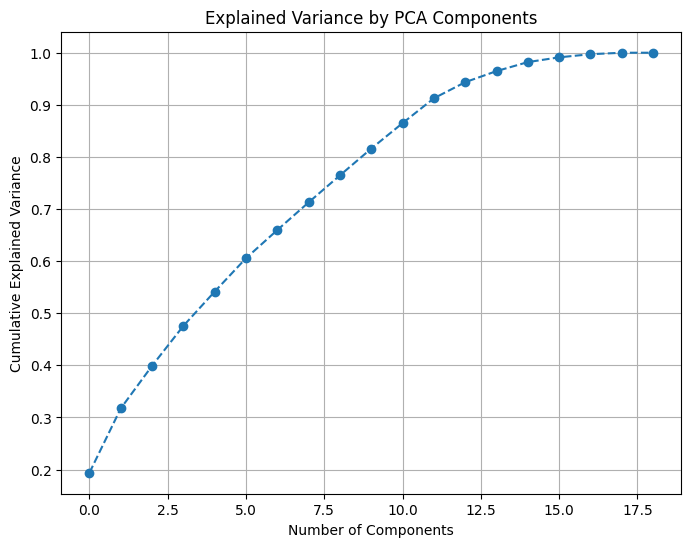

In [ ]:
# Initialize PCA to keep all components
pca = PCA()
# Fit PCA to the scaled data
pca.fit(pre_process_scaled)
# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Explained Variance by PCA Components')
plt. xlabel( 'Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [ ]:
# 10 componnts already explained total 80% of Variance

import numpy as np
# Find the number of components that explain at least 80% of the variance
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variance_ratio_cumulative >= 0.80) + 1

# Initialize PCA with the optimal number of components
pca_optimal = PCA(n_components=n_components)

# Fit and transform the data using the optimal PCA
customers_pca = pca_optimal.fit_transform(customers_scaled)

print(f"Optimal number of components for 80% variance: {n_components}")
print(f"Shape of the reduced data: {customers_pca.shape}")


Optimal number of components for 80% variance: 10
Shape of the reduced data: (4124, 10)


In [ ]:
# Checking how resulting compotents are linked with the original features
component_matrix = pd.DataFrame (pca.components_).T
component_matrix.columns = [f"pca_{i}"for i in range(component_matrix.shape[1])]
component_matrix.index = customers_scaled.columns
component_matrix

pca_0     pca_1     pca_2     pca_3     pca_4  \
gender                    0.011920 -0.002172 -0.018905  0.075293 -0.066875   
married                  -0.051725  0.051057  0.116210  0.651106  0.047720   
home_country              0.009763 -0.020145 -0.049958 -0.083859  0.090771   
has_children             -0.082269  0.000610  0.070306  0.298357  0.010863   
age                       0.040185 -0.000273  0.084951  0.630362  0.065218   
tenure_months             0.032872  0.021375 -0.057057  0.002984 -0.045520   
amount_of_trips           0.465888 -0.051014  0.086415  0.044542 -0.090512   
amount_of_sessions        0.020188  0.027457  0.015608  0.165004 -0.128688   
avg_page_clicks           0.390556 -0.171164 -0.025862 -0.041113  0.224638   
rooms_avg                 0.164670  0.472148 -0.054529 -0.016184 -0.297679   
nights_avg                0.028234  0.192021  0.658572 -0.126367  0.176835   
hotel_price_avg           0.035346  0.308504  0.586515 -0.115939  0.090924   
hotel_count               0.453059 -0.054113  0.103387  0.041294 -0.103248   
seats_avg                 0.128006  0.523687 -0.209802  0.006835 -0.246738   
flight_price_avg          0.118004  0.511871 -0.294319  0.020517  0.284690   
flight_count              0.447770 -0.085241 -0.055238  0.064327 -0.098201   
checked_bags_avg          0.003015  0.078469 -0.008873  0.089699  0.017775   
avg_km_flown              0.001178  0.163876 -0.184457  0.018710  0.749715   
session_duration_avg_sec  0.390367 -0.171565 -0.025940 -0.041191  0.224903   

                             pca_5     pca_6     pca_7     pca_8     pca_9  \
gender                   -0.287273  0.415712  0.204669 -0.410670  0.609665   
married                   0.094480  0.000393  0.062928 -0.036569 -0.057472   
home_country              0.045627 -0.311110  0.734478 -0.451972 -0.109102   
has_children              0.200052  0.034485  0.009267 -0.268762 -0.053136   
age                       0.041341 -0.098331 -0.005486  0.050285 -0.088693   
tenure_months            -0.027696  0.451256  0.588719  0.504028 -0.330803   
amount_of_trips          -0.257842 -0.185200  0.020241  0.043131 -0.011547   
amount_of_sessions       -0.379662  0.456574 -0.078396  0.025156 -0.003472   
avg_page_clicks           0.412192  0.269414 -0.047116 -0.075742  0.041592   
rooms_avg                 0.146610  0.034220 -0.030668 -0.095710 -0.054501   
nights_avg               -0.043867  0.041145  0.023488  0.013631  0.018636   
hotel_price_avg           0.044339  0.047315  0.044866 -0.015107 -0.009782   
hotel_count              -0.222527 -0.162843  0.017703  0.023847 -0.019566   
seats_avg                 0.183892  0.026533 -0.012922 -0.060116 -0.006569   
flight_price_avg         -0.069876  0.005890 -0.040447 -0.015622 -0.007299   
flight_count             -0.245263 -0.181329  0.011314  0.040536 -0.019571   
checked_bags_avg          0.213867 -0.248759  0.223562  0.514801  0.696381   
avg_km_flown             -0.306447 -0.030940 -0.034574  0.048518 -0.013212   
session_duration_avg_sec  0.412354  0.269229 -0.047808 -0.075364  0.041341   

                            pca_10        pca_11    pca_12    pca_13  \
gender                   -0.135804 -3.568222e-01 -0.074911  0.003171   
married                  -0.137348 -7.374332e-02  0.715516  0.014043   
home_country             -0.069035  3.491472e-01  0.000990 -0.013608   
has_children              0.854835 -1.302729e-01 -0.184793 -0.018174   
age                      -0.356981  3.228477e-02 -0.661643 -0.017127   
tenure_months             0.075490 -2.645404e-01 -0.051035 -0.019236   
amount_of_trips           0.099285 -7.723557e-02  0.041512  0.037444   
amount_of_sessions        0.143249  7.577321e-01  0.018239  0.017936   
avg_page_clicks          -0.059038  9.630976e-02  0.014870 -0.001761   
rooms_avg                -0.046106  1.225559e-02 -0.002784 -0.559347   
nights_avg               -0.019536 -9.583583e-07 -0.015149 -0.440844   
hotel_price_avg          -0.010641  9.15698

<Axes: >

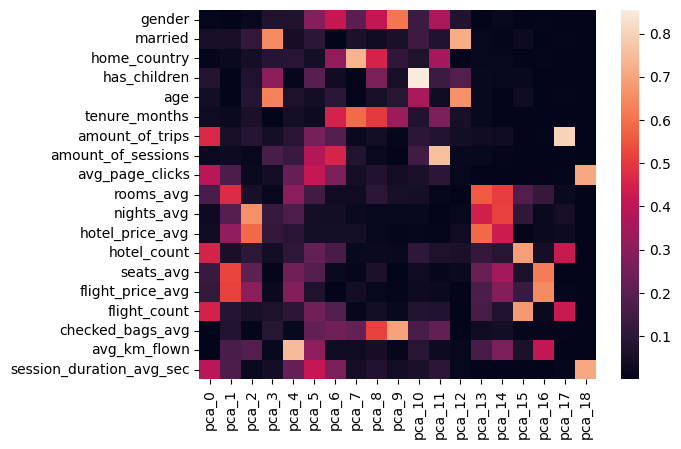

In [ ]:
sns.heatmap(np.abs(component_matrix))

**Observation from heatmap**

✅ Strong Contributors (High Loadings)

avg_page_clicks, amount_of_trips, flight_count, and flight_price_avg have high loadings across multiple principal components (especially pca_0, pca_4, pca_6, pca_9). These are key features driving variation in the dataset.

session_duration_avg_sec and avg_km_flown also contribute significantly to later PCs (pca_17, pca_18). Indicates unique user behavior patterns not explained by the first few components.

🔻 Weak Contributors

gender, home_country, and has_children have low loadings across most PCs. These features add less variance and may be less important for clustering or modeling.

In [ ]:
pca = PCA(n_components = n_components) # 10
data_after_pca = pca.fit_transform(customers_scaled)
data_after_pca = pd.DataFrame(data_after_pca)

In [ ]:
data_after_pca.columns = [f"pca_{i}"for i in range(data_after_pca.shape [1])]
data_after_pca. index = customers_scaled. index
data_after_pca

pca_0     pca_1     pca_2     pca_3     pca_4     pca_5     pca_6  \
0    -1.289171  3.480015 -1.825060 -0.948778  0.393159 -1.155288 -0.300704   
1     2.621097  2.451049 -2.188097 -0.565541  1.121231 -0.211496 -0.462391   
2     2.077508  2.220885 -1.032851  0.914265 -2.332077  0.061391  2.673822   
3     0.528192  2.003011  1.618837 -1.976680  0.935373 -0.374705 -0.898780   
4    -0.877870  1.493231 -2.068439 -1.901390 -1.144368  1.206784 -0.986602   
...        ...       ...       ...       ...       ...       ...       ...   
5777  4.622175  2.823282 -1.052847 -1.241916  0.590420  0.641335  0.031629   
5778 -1.564001 -0.094310 -0.311909 -0.066069  1.816868  1.256263 -2.406249   
5779 -1.551870  0.324276  0.805183  0.521237  1.497507 -0.035283 -0.028801   
5780  0.359534 -0.817350 -1.051063  2.404780 -0.802130  0.744150  1.641278   
5781 -1.483581  2.779475  2.811114 -0.038146 -0.872644  0.366434  0.176281   

         pca_7     pca_8     pca_9  
0    -0.443841  0.135476  0.068121  
1    -1.018624 -0.192769  0.839749  
2     3.296101  2.673841 -2.571720  
3     1.093987 -1.772287 -0.024636  
4    -1.092188  1.159508 -1.636212  
...        ...       ...       ...  
5777 -0.240503  0.577830  1.402449  
5778  0.776595  0.394566 -0.916788  
5779 -0.722585 -0.245130  0.417626  
5780 -0.579076 -0.739827 -0.276196  
5781 -0.760967 -1.695884 -0.553500  

[4124 rows x 10 columns]

**5. Clustering (K-Means)**

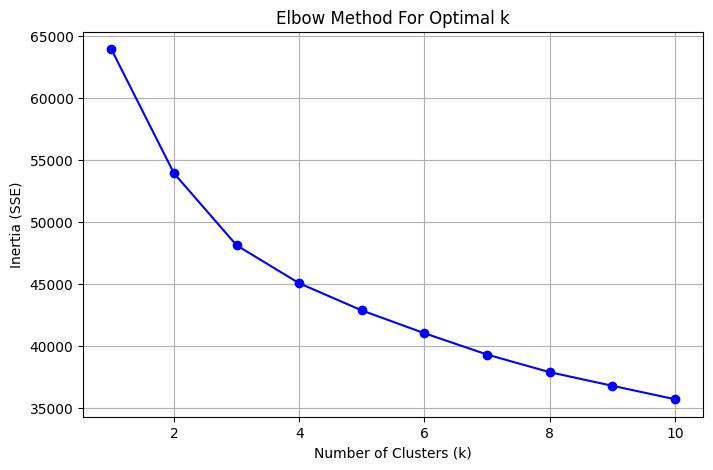

In [ ]:
# clustering
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, n_init=100, random_state=42)
    kmeans.fit(data_after_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

Based on Elbow Method plot, we look for the point where the inertia (SSE, sum of squared errors) starts decreasing more slowly — that’s the “elbow”, and it typically suggests the optimal number of clusters (k).

•	There’s a sharp drop from k = 1 → 2 → 3 → 4
•	Then a smaller improvement from k = 4 → 5 → 6, and so on.
•	In this plot, the clear elbow is around k = 3 or k = 4.

✅ Optimal k = 4

This is where the curve starts to “flatten”, meaning adding more clusters yields diminishing returns in reducing SSE.
For marketing strategy too many cluster would not be worth. May be 5 ot 6 can be optimum from algorithm but we choose 3.

In [ ]:
X = data_after_pca # pre_process_scaled can be used as well
kmeans = KMeans(n_clusters=4, n_init=100, random_state=42)
pre_process_data['cluster'] = kmeans.fit_predict(X)

In [ ]:
print(pre_process_data['cluster'].value_counts(normalize=True))
pre_process_data['cluster'].value_counts()


cluster
3    0.381183
2    0.344568
1    0.141610
0    0.132638
Name: proportion, dtype: float64


cluster
3    1572
2    1421
1     584
0     547
Name: count, dtype: int64

In [ ]:
pre_process_data

gender  married  home_country  has_children  age  tenure_months  \
0          1        0             0             0   40             26   
1          1        0             0             0   43             25   
2          1        1             0             0   48             33   
3          1        0             1             0   37             25   
4          0        0             0             0   29             26   
...      ...      ...           ...           ...  ...            ...   
5777       1        0             0             0   35             26   
5778       0        1             1             0   42             25   
5779       1        1             0             0   48             25   
5780       1        1             0             1   55             26   
5781       1        1             0             1   37             25   

      amount_of_trips  amount_of_sessions  avg_page_clicks  rooms_avg  \
0                   2                   8         9.375000   1.500000   
1                   4                   8        19.875000   1.500000   
2                   4                   8        16.125000   1.750000   
3                   3                   8        15.750000   1.333333   
4                   2                   8        13.875000   1.500000   
...               ...                 ...              ...        ...   
5777                5                   8        24.250000   1.600000   
5778                2                   8        15.500000   1.000000   
5779                2                   8        15.000000   1.000000   
5780                3                   9        20.333333   1.000000   
5781                2                   8        11.375000   1.500000   

      nights_avg  hotel_price_avg  hotel_count  seats_avg  flight_price_avg  \
0       3.500000       714.000000          2.0   1.500000       1676.630000   
1       2.250000       677.750000          4.0   1.500000       1790.872500   
2       2.000000      1028.500000          4.0   1.750000        720.802500   
3       7.333333      2140.666667          3.0   1.333333        762.496667   
4       1.500000       291.000000          2.0   1.500000        931.700000   
...          ...              ...          ...        ...               ...   
5777    5.400000       918.200000          5.0   1.800000       1541.054000   
5778    4.000000       541.500000          2.0   1.000000        546.350000   
5779    5.000000      1300.000000          1.0   1.000000        523.340000   
5780    1.000000       270.500000          2.0   1.333333        449.743333   
5781    8.000000      2365.000000          2.0   1.500000        486.595000   

      flight_count  checked_bags_avg  avg_km_flown  session_duration_avg_sec  \
0              2.0          0.500000   3238.749749                 70.875000   
1              4.0          0.750000   3342.929238                146.750000   
2              4.0          0.250000   1201.119453                119.625000   
3              3.0          0.333333   2818.710430                116.375000   
4              2.0          0.500000   1484.887202                102.750000   
...            ...               ...           ...                       ...   
5777           5.0          1.200000   2816.228255                179.875000   
5778           1.0          1.000000   3163.054440                115.125000   
5779           2.0          0.500000   3121.115690                112.500000   
5780           3.0          0.333333   1193.525629                150.111111   
5781           2.0          0.000000   1494.297709                 83.750000   

      cluster  
0           1  
1           1  
2           1  
3           0  
4           1  
...       ...  
5777        1  
5778        3  
5779        0  
5780        2  
5781        0  

[4124 rows x 20 columns]

In [ ]:
pre_process_data.groupby('cluster').mean()

gender   married  home_country  has_children        age  \
cluster                                                              
0        0.875686  0.539305      0.146252      0.361974  43.749543   
1        0.904110  0.501712      0.150685      0.294521  43.856164   
2        0.897959  0.396904      0.172414      0.247713  44.315271   
3        0.886132  0.477735      0.181298      0.379771  43.160305   

         tenure_months  amount_of_trips  amount_of_sessions  avg_page_clicks  \
cluster                                                                        
0            25.992687         2.694698            8.168190        14.511619   
1            26.121575         3.054795            8.243151        15.661865   
2            26.040113         4.315975            8.201267        19.732067   
3            25.954198         2.087150            8.185115        13.883017   

         rooms_avg  nights_avg  hotel_price_avg  hotel_count  seats_avg  \
cluster                                                                   
0         1.135558    7.292809      1646.103169     2.405850   1.057587   
1         1.601084    3.683619       987.032828     2.691781   1.635987   
2         1.114744    3.660587       696.446671     3.954961   1.097145   
3         0.985793    2.929389       514.813160     1.815522   1.024438   

         flight_price_avg  flight_count  checked_bags_avg  avg_km_flown  \
cluster                                                                   
0              392.347148      1.928702          0.604357   2058.306682   
1             1193.619402      2.727740          0.667666   2238.086930   
2              443.327175      3.908515          0.558155   2006.779024   
3              377.772235      1.877863          0.531860   2095.038900   

         session_duration_avg_sec  
cluster                            
0                      108.073908  
1                      116.588952  
2                      146.777689  
3                      103.441757

In [ ]:
pre_process_data.mean()

gender                         0.891368
married                        0.461445
home_country                   0.169253
has_children                   0.319835
age                           43.734966
tenure_months                 26.012609
amount_of_trips                3.072745
amount_of_sessions             8.196654
avg_page_clicks               16.233694
rooms_avg                      1.137221
nights_avg                     3.866900
hotel_price_avg              794.321681
hotel_count                    2.755092
seats_avg                      1.140489
flight_price_avg             517.825774
flight_count                   2.704656
checked_bags_avg               0.569768
avg_km_flown                2080.012286
session_duration_avg_sec     120.850125
cluster                        1.974297
dtype: float64

In [ ]:
# prompt: save the pre_process_data in csv and download it in my pc

import pandas as pd
from google.colab import files

# Assuming 'pre_process_data' DataFrame is already created as in your provided code

# Save the DataFrame to a CSV file
#pre_process_data.to_csv('pre_process_data.csv', index=False)

# Download the CSV file
#files.download('pre_process_data.csv')


# **Analyze the clusters from Unsupervised ML**

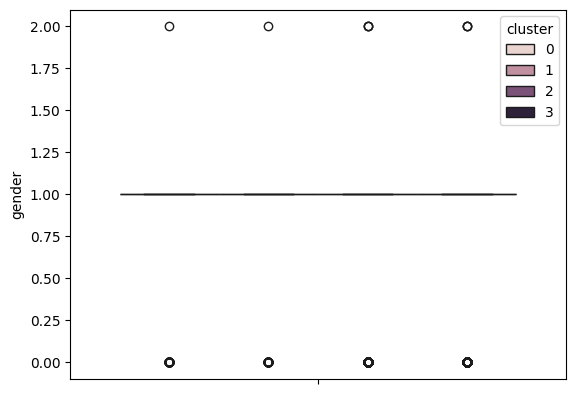

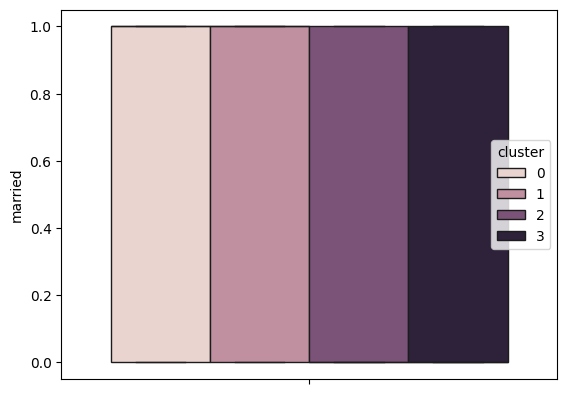

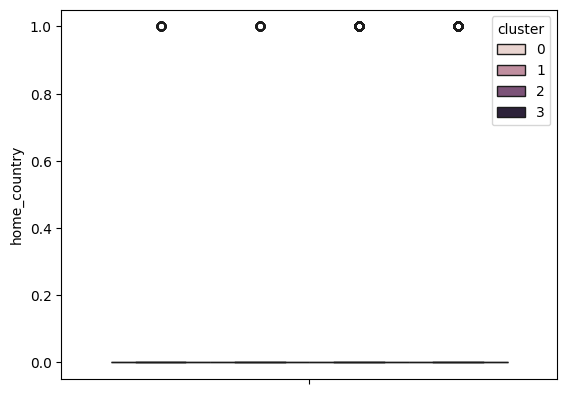

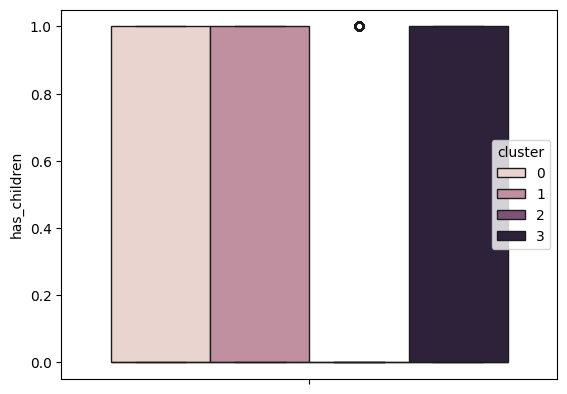

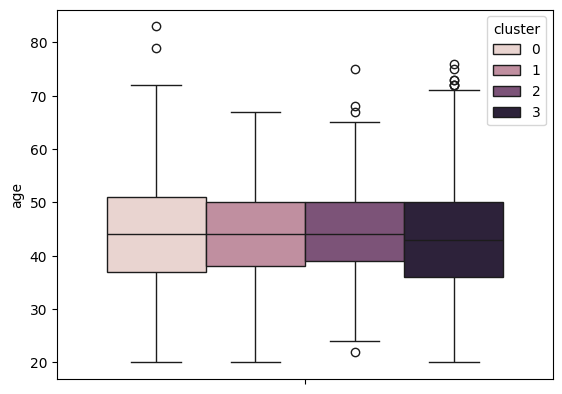

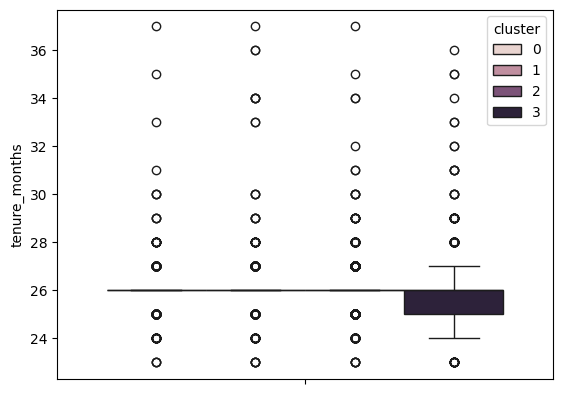

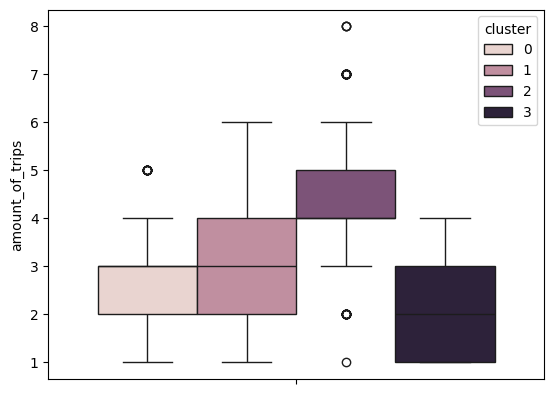

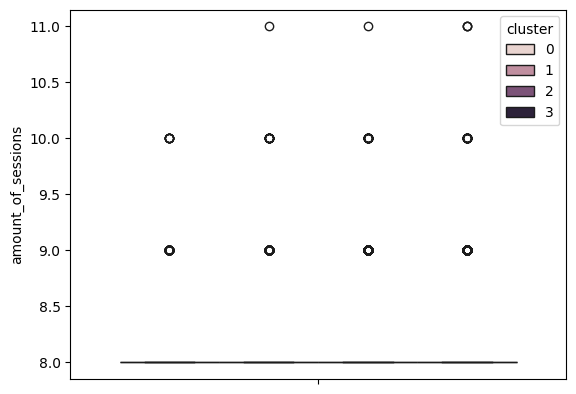

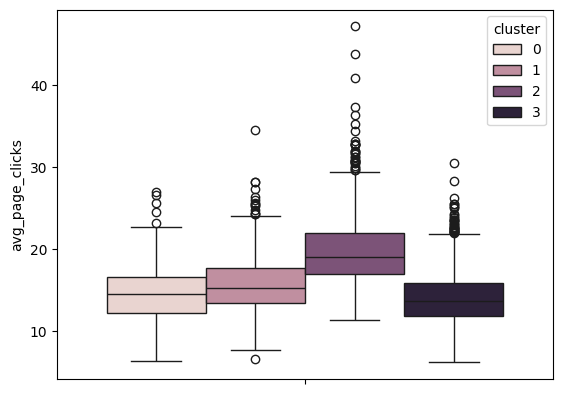

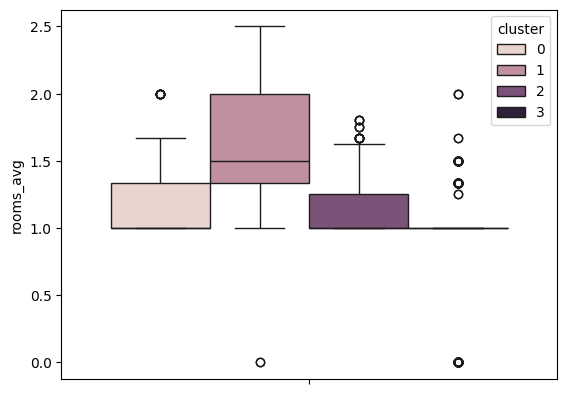

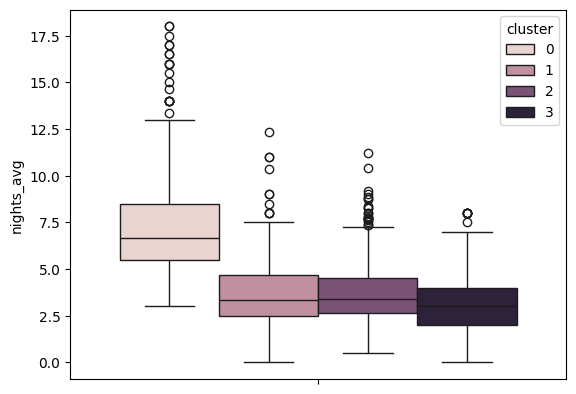

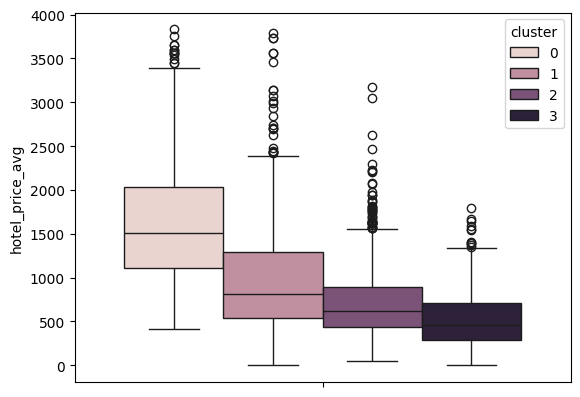

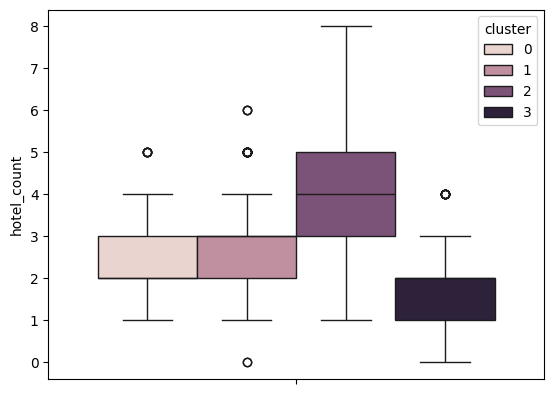

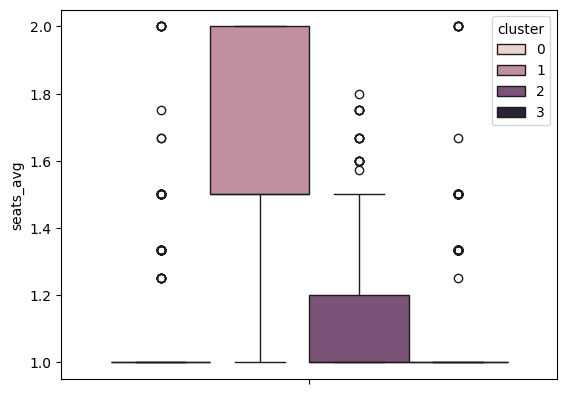

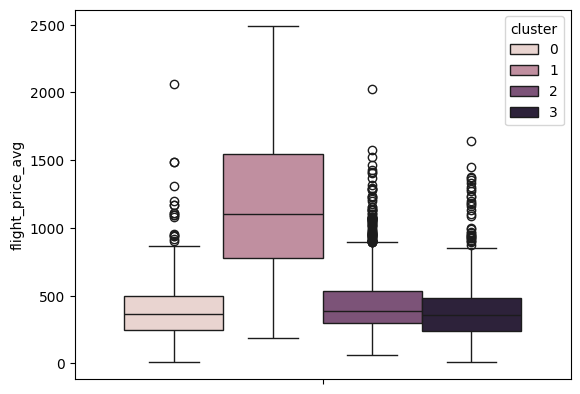

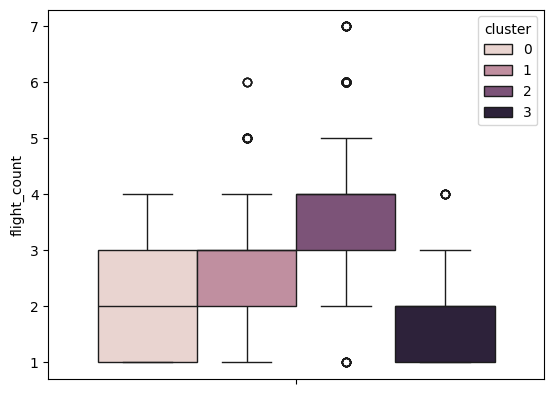

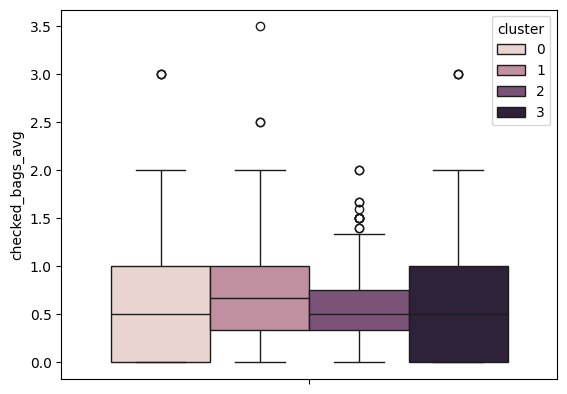

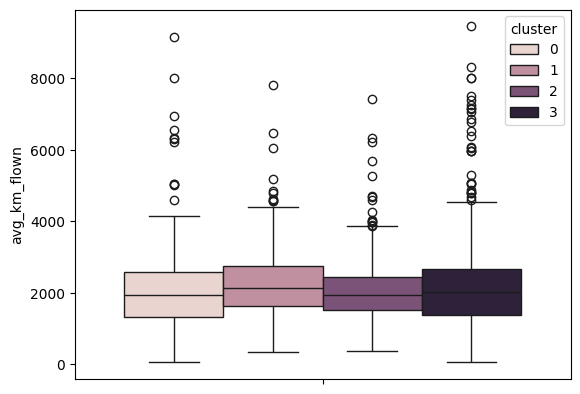

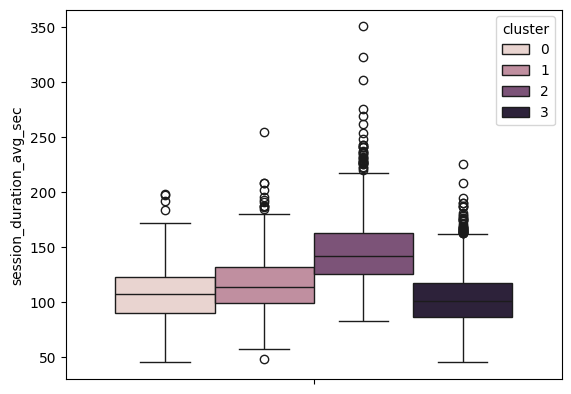

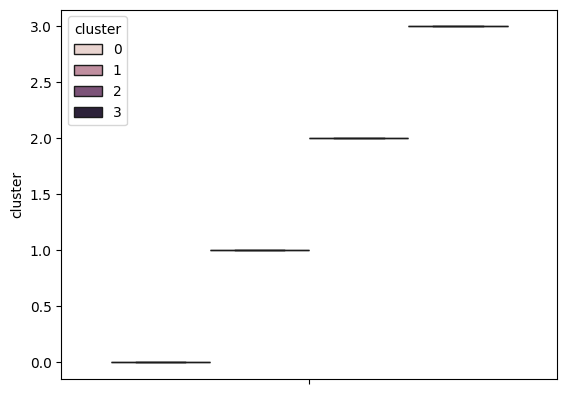

In [ ]:
for col in pre_process_data.columns:
    sns.boxplot(data=pre_process_data, y=col, hue='cluster')
    plt.show()

🟢 **Cluster 0: “Senior Travelers”**

🔍 Behavior Summary:

* Average age: 43.75
* Moderate on trips (2.7) and flights (1.9), but longest hotel stays (7.3 nights).
* Highest hotel spending: hotel_price_avg = 1646
* Avg. Flight spending 379 (low)
* Decent engagement: avg_page_clicks = 14.5, session_duration = 108s

🧠 Interpretation:

* They are **relaxed luxury travelers**.
* Users who travel occasionally but **seek affordable and well-balanced** travel experiences — not too frequent, not too luxurious.
* They travel less frequently but prefer premium, long hotel stays — **likely vacationers or semi-retired couples on relaxing trips.**

🎁 Suggested Perks:

* Exclusive discount on hotel meal or at restaurant
* Discount on spam, visiting museum
* 1-night free hotel with flight
* Personalized hotel/flight combos
* Basic loyalty points on longer stays
* Flexible check-out
  


**🔴 Cluster 1: “Family Travelers”**

🔍 Behavior Summary:

* has_children: 0.29 → not the highest, but still notable.
* Second highest night stay 3.68
* seats_avg: 1.64, rooms_avg: 1.6 → highest among all clusters! ✅
* checked_bags_avg: 0.67 → highest → families often carry more.
* Moderate-to-high hotel and flight counts.
* High spenders on flights: flight_price_avg = 1193
* Higher hotel spend too: hotel_price_avg = 987
* Balanced trips, hotels, and sessions


🧠 Interpretation:

* They can be called **Family Comfort Seekers**.
* These travelers likely include families who fly together, book multiple seats, and need comfort.

🎁 Suggested Perks:

* Free checked bags
* Priority support and booking concierge
* No cancellation fees
* Room upgrades or free hotel meals
* Exclusive discount on flight and hotel

**🟣 Cluster 2: “Business Travelers”**

🔍 Behavior Summary:

* Highest trip count: 4.36 trips and flights (3.91)
* Night stay avg. 3.66
* Most hotel bookings: hotel_count = 3.95
* Highest page engagement: ~20 clicks per session
* Moderate price sensitivity (flight_price_avg = 443) and (hotel_price= 696)
* Value-conscious but active, they use both flight and hotel
* Longer session duration = active comparison shoppers
* Highest page_clicks
* Lowest has_children (0.25)- supports business travel assumption

🧠 Interpretation:

* **Active, Frequent, value-conscious travelers** who explore options deeply and optimize their bookings.
* High-frequency, high-engagement users who optimize travel for work and productivity(**Hyper Travel Explorers**).

🎁 Suggested Perks:

* Free hotel meal
* Exclusive app-only deals
* Free night after 5 trips
* Loyalty tier with milestone rewards

**🟡 Cluster 3: “Casual Deal Seekers”**

🔍 Behavior Summary:

* Lowest in almost all metrics:
	* trips = 2.0
	* hotel_count = 1.8
	* flight_count = 1.87
* Lowest spend: hotel_price_avg = 514, flight_price_avg = 377
* Slightly lower engagement

🧠 Interpretation:

* **Occasional travelers**, possibly **price-sensitive** or infrequent users.

🎁 Suggested Perks:

* Exclusive Discounts / Promo Codes
* Referral bonuses
* Bundle offers: Hotel + Flight
* Free Checked Bag on next booking

In [ ]:
data_after_pca

pca_0     pca_1     pca_2     pca_3     pca_4     pca_5     pca_6  \
0    -1.289171  3.480015 -1.825060 -0.948778  0.393159 -1.155288 -0.300704   
1     2.621097  2.451049 -2.188097 -0.565541  1.121231 -0.211496 -0.462391   
2     2.077508  2.220885 -1.032851  0.914265 -2.332077  0.061391  2.673822   
3     0.528192  2.003011  1.618837 -1.976680  0.935373 -0.374705 -0.898780   
4    -0.877870  1.493231 -2.068439 -1.901390 -1.144368  1.206784 -0.986602   
...        ...       ...       ...       ...       ...       ...       ...   
5777  4.622175  2.823282 -1.052847 -1.241916  0.590420  0.641335  0.031629   
5778 -1.564001 -0.094310 -0.311909 -0.066069  1.816868  1.256263 -2.406249   
5779 -1.551870  0.324276  0.805183  0.521237  1.497507 -0.035283 -0.028801   
5780  0.359534 -0.817350 -1.051063  2.404780 -0.802130  0.744150  1.641278   
5781 -1.483581  2.779475  2.811114 -0.038146 -0.872644  0.366434  0.176281   

         pca_7     pca_8     pca_9  
0    -0.443841  0.135476  0.068121  
1    -1.018624 -0.192769  0.839749  
2     3.296101  2.673841 -2.571720  
3     1.093987 -1.772287 -0.024636  
4    -1.092188  1.159508 -1.636212  
...        ...       ...       ...  
5777 -0.240503  0.577830  1.402449  
5778  0.776595  0.394566 -0.916788  
5779 -0.722585 -0.245130  0.417626  
5780 -0.579076 -0.739827 -0.276196  
5781 -0.760967 -1.695884 -0.553500  

[4124 rows x 10 columns]

In [ ]:
import plotly.express as px
fig = px.scatter_3d(pca.fit_transform(customers_scaled)[:,:3], x=0, y=1, z=2, color=kmeans. labels_)
fig.update_traces(marker=dict(size=0.5))
fig. show()

# **Evaluation**

In [ ]:
# Evaluation with PCA
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(data_after_pca, kmeans.labels_) # Close to 0	, Better separation and compactness
print(f"Davies-Bouldin Index: {db_index:.3f}")

from sklearn.metrics import calinski_harabasz_score

ch_index = calinski_harabasz_score(data_after_pca, kmeans.labels_) # High,	Good cluster separation
print(f"Calinski-Harabasz Index: {ch_index:.3f}")


from sklearn.metrics import silhouette_score

score = silhouette_score(data_after_pca, kmeans.labels_) # close to 1 better
print(f"Silhouette Score: {score:.3f}")

Davies-Bouldin Index: 1.952
Calinski-Harabasz Index: 576.384
Silhouette Score: 0.148


In [ ]:
# Evaluation without PCA

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming 'pre_process_scaled' is your scaled data and already exists
# from the previous code.

kmeans_ = KMeans(n_clusters=4, n_init=100, random_state=42)
kmeans_.fit(pre_process_scaled)
labels_1 = kmeans.labels_

silhouette_avg = silhouette_score(pre_process_scaled, labels_1)
print(f"Silhouette Score for k=4: {silhouette_avg}")


Silhouette Score for k=4: 0.12003552643279149


# **Alternative Clustering Method**

**DB-Scan Clustering**

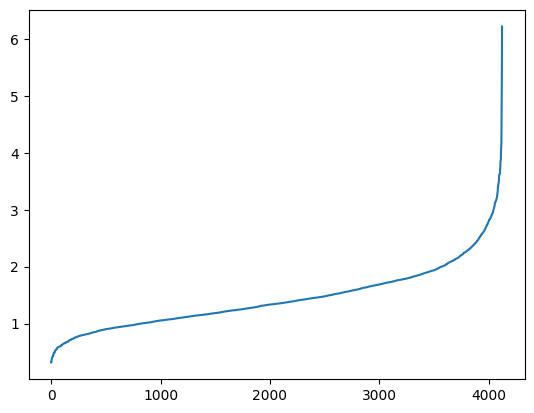

Best Silhouette Score: 0.287
Best Parameters: {'eps': np.float64(2.5), 'min_samples': 3}
DBSCAN Evaluation Metrics:
Davies-Bouldin Index: 4.085
Calinski-Harabasz Index: 81.084
Silhouette Score: 0.287


 Aftet DB Scan Clustering


gender   married  home_country  has_children        age  \
cluster                                                              
-1       0.707113  0.464435      0.351464      0.317992  42.924686   
 0       0.902703  0.461261      0.158044      0.319949  43.784813   

         tenure_months  amount_of_trips  amount_of_sessions  avg_page_clicks  \
cluster                                                                        
-1           27.104603         2.719665            8.251046        16.968672   
 0           25.945431         3.094466            8.193308        16.188479   

         rooms_avg  nights_avg  hotel_price_avg  hotel_count  seats_avg  \
cluster                                                                   
-1        1.304757    5.058503      1284.210937     2.380753   1.368559   
 0        1.126915    3.793594       764.184350     2.778121   1.126458   

         flight_price_avg  flight_count  checked_bags_avg  avg_km_flown  \
cluster                                                                   
-1             857.360974      2.317992          0.791373   2460.754977   
 0             496.938023      2.728443          0.556135   2056.589505   

         session_duration_avg_sec  
cluster                            
-1                     126.285488  
 0                     120.515748

In [ ]:
# prompt: try DB scan cluster with data_after_pca with hyperparameter tune and evaluate the result

import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Find optimal eps using k-distance graph
neighbors = NearestNeighbors(n_neighbors=10)  # Adjust n_neighbors as needed(n_neighbors=min_samples/min_samples=PCA_com or no of features (5-15))
neighbors_fit = neighbors.fit(data_after_pca)
distances, indices = neighbors_fit.kneighbors(data_after_pca)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

# Based on the plot, choose an eps value. For example:
eps_value = 1.5 # Example value. Adjust based on the k-distance graph

# Hyperparameter tuning for DBSCAN (example using eps and min_samples)
best_score = -1
best_params = {}

for eps in np.arange(0.5, 3, 0.5): # Example range of eps values
    for min_samples in range(3, 10): # Example range of min_samples values
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(data_after_pca)

        if len(set(clusters)) > 1: # Check if more than one cluster is found
          score = silhouette_score(data_after_pca, clusters)
          if score > best_score:
              best_score = score
              best_params = {'eps': eps, 'min_samples': min_samples}


print(f"Best Silhouette Score: {best_score:.3f}")
print(f"Best Parameters: {best_params}")


# Apply DBSCAN with the best parameters
best_dbscan = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
best_clusters = best_dbscan.fit_predict(data_after_pca)


# Evaluate the best DBSCAN model
db_index_dbscan = davies_bouldin_score(data_after_pca, best_clusters)
ch_index_dbscan = calinski_harabasz_score(data_after_pca, best_clusters)
silhouette_avg_dbscan = silhouette_score(data_after_pca, best_clusters)

print("DBSCAN Evaluation Metrics:")
print(f"Davies-Bouldin Index: {db_index_dbscan:.3f}")
print(f"Calinski-Harabasz Index: {ch_index_dbscan:.3f}")
print(f"Silhouette Score: {silhouette_avg_dbscan:.3f}")

# Visualize results (example using first 3 PCA components)
fig = px.scatter_3d(data_after_pca.iloc[:,:3], x='pca_0', y='pca_1', z='pca_2', color=best_clusters)
fig.update_traces(marker=dict(size=2))
fig.show()

data_after_DB_scan=pre_process_data.copy()
# create cluster column in data_after_DB_scan
data_after_DB_scan['cluster']=best_clusters
print(' Aftet DB Scan Clustering')
data_after_DB_scan.groupby('cluster').mean()




Cluster -1 (Noise group)

	•	71% male, mid-age (42), high hotel & flight spend
	•	Longer sessions, higher activity
	•	Possibly high-value users being treated as noise

Cluster 0

	•	90% male, similar age, slightly lower metrics across the board
	•	Might be absorbing all other users into one vague blob

➡️ Clustering is not very granular — only 1 real cluster and a noise group, which isn’t very helpful for segmentation.

Evaluation

Silhouette Score 0.287 (Better cohesion and separation than K-Means). From DB and CH index poor cluster separation and low between-cluster separation vs.compactness.

**HDB-Scan Clusterimg**

In [ ]:
from hdbscan import HDBSCAN
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
clusterer = HDBSCAN(min_cluster_size=20)
labels = clusterer.fit_predict(data_after_pca)
data_after_HDB_scan=pre_process_data.copy()
# create cluster column in data_after_DB_scan
data_after_HDB_scan['cluster']=labels

# evaluate the silhouete score
score = silhouette_score(data_after_pca, labels)
print('silhouete score_from HDB_Scan',score)

print(' Aftet HDB Scan Clustering')
data_after_HDB_scan.groupby('cluster').mean()



silhouete score_from HDB_Scan -0.07043969157288235
 Aftet HDB Scan Clustering


gender   married  home_country  has_children        age  \
cluster                                                              
-1       0.827308  0.477669      0.254785      0.346661  43.759251   
 0       0.000000  0.309524      0.000000      0.261905  44.714286   
 1       1.000000  0.383838      1.000000      0.202020  41.898990   
 2       1.000000  0.446691      0.000000      0.289828  43.786152   

         tenure_months  amount_of_trips  amount_of_sessions  avg_page_clicks  \
cluster                                                                        
-1           26.054870         2.961293            8.259889        16.396302   
 0           26.000000         3.309524            8.047619        16.083333   
 1           25.979798         3.262626            8.010101        15.675365   
 2           25.954044         3.215686            8.120711        16.037187   

         rooms_avg  nights_avg  hotel_price_avg  hotel_count  seats_avg  \
cluster                                                                   
-1        1.195797    4.106215       922.723917     2.644407   1.210435   
 0        1.007937    3.567460       561.485317     3.047619   1.000000   
 1        1.023906    3.271044       539.007576     2.909091   1.019697   
 2        1.063041    3.566003       630.829994     2.897672   1.050670   

         flight_price_avg  flight_count  checked_bags_avg  avg_km_flown  \
cluster                                                                   
-1             618.792167      2.560187          0.599671   2166.894108   
 0             369.767667      3.071429          0.503571   2110.431772   
 1             397.848618      3.030303          0.485017   2155.254076   
 2             383.465596      2.883578          0.533535   1949.506331   

         session_duration_avg_sec  
cluster                            
-1                     122.035285  
 0                     119.912698  
 1                     116.707492  
 2                     119.418250

Bad silhouette score from HDB_Scan and features mean value for each clusters are not so distinct.

# **Final Recommendation on Clustering Algorithim**

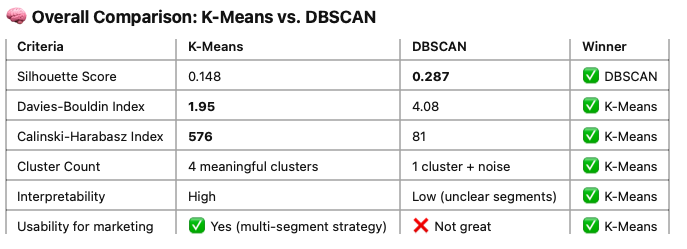

**➡️ Go with: K-Means**

Even though DBSCAN gave a higher Silhouette Score, it collapsed the data into 1 cluster + noise, which is not actionable for customer segmentation.

K-Means gives 4 interpretable clusters that:

	•	Align well with behavioral patterns (luxury, business, family, casual)
	•	Support tailored marketing strategies and rewards
	•	Offer better cluster compactness and separation

# **Final Dataset with all users and clusters (EDA + ML approach)**

In [ ]:
customers.shape
customer_segment=customers.copy()
customer_segment.head()

user_id  gender  married home_country  has_children  age  tenure_months  \
0   531931       1    False          usa         False   40             26   
1   611065       1    False          usa         False   43             25   
2   229330       1     True          usa         False   48             33   
3   586762       1    False       canada         False   37             25   
4   536035       0    False          usa         False   29             26   

   amount_of_trips  amount_of_sessions  avg_page_clicks  ...  rooms_avg  \
0                2                   8            9.375  ...   1.500000   
1                4                   8           19.875  ...   1.500000   
2                4                   8           16.125  ...   1.750000   
3                3                   8           15.750  ...   1.333333   
4                2                   8           13.875  ...   1.500000   

   nights_avg  hotel_price_avg  hotel_count  seats_avg  flight_price_avg  \
0    3.500000       714.000000          2.0   1.500000       1676.630000   
1    2.250000       677.750000          4.0   1.500000       1790.872500   
2    2.000000      1028.500000          4.0   1.750000        720.802500   
3    7.333333      2140.666667          3.0   1.333333        762.496667   
4    1.500000       291.000000          2.0   1.500000        931.700000   

   flight_count  checked_bags_avg  avg_km_flown  session_duration_avg_sec  
0           2.0          0.500000   3238.749749                    70.875  
1           4.0          0.750000   3342.929238                   146.750  
2           4.0          0.250000   1201.119453                   119.625  
3           3.0          0.333333   2818.710430                   116.375  
4           2.0          0.500000   1484.887202                   102.750  

[5 rows x 21 columns]

In [ ]:
cluster_ML_dict = dict(zip(pre_process_data.index, pre_process_data['cluster']))
#print(cluster_ML_dict)

In [ ]:
#group_graduation_trip
#group_cancelled_trips
#customers_outlier